<img src="logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021/2022
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 29/06/2022 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***


<b>Dados da pesquisa na base SCOPUS (541) e PubMed (188) - 729 documentos para análise</b>

**A Fazer**

1. [x] Criado projeto no git para Fork e acompanhamento do Will
1. [ ] 6+ - Há um documento que não foi necessário baixar PDF, verificar este
1. [ ] Ler novos documentos de 2022
1. [ ] Analisr biblioteca Python do MetaMap
1. [ ] Ajustar documento / manual de instalação do Metamap
1. [ ] Documentos sem abstract serão deixados por último
1. [ ] Melhorar busca de massa de dados no Twitter com o Knime
1. [ ] Ajustar / rodar MetaMap com nova massa de dados

---

[Projeto no GitHub](https://github.com/LuizPerciliano/Evento-Adverso-com-Metamap-e-Twitter-com-Portugues-Brasil)

[Site da dissertação](https://www.overleaf.com/read/rtybccmfvfr7)

[Manual de instalação do Metamap DFB 2021](https://www.overleaf.com/read/jsyhtqwwgccz)

# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os, re
import sys
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

import nltk
#nltk.download()
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

# deixa os gráficos com fundo cinza, verificar se vale a pena este, ou habilitar só para gráficos específicos
#plt.style.use("ggplot")

from google_trans_new import google_translator

from bs4 import BeautifulSoup
from bs4.formatter import HTMLFormatter
import requests

Importar as bibliotecas necessárias e mapear a pasta do projeto.


## Variáveis globais

In [2]:
dict_colors = {
    'red':'\033[0;31m'
    ,'green':'\033[0;32m'
    ,'yellow':'\033[0;33m'
    ,'blue':'\033[0;34m'
    ,'blue_underline':'\033[4;34m'
    ,'roxo':'\033[0;35m'
    ,'ciano':'\033[0;36m'
    ,'cinza':'\033[0;37m'
    ,'black&red':'\033[0;31;40m'
    ,'close_color':'\033[m'
}

In [3]:
data_inicio = pd.Timestamp.now()
dataFormatada = data_inicio.strftime('%d-%m-%Y %H-%M-%S')
print(f"Iniciando o programa em: {dict_colors['blue_underline']}{dataFormatada}{dict_colors['close_color']}")

Iniciando o programa em: 10-07-2022 00-12-13


In [4]:
# Montando caminho onde as imagens serão salvas
path_image = os.path.join('..','image')

## Verificar, atualizar e instalar se necessário python e módulos

In [ ]:
## versao 3,9,0 estava funcionando
print('Local de instalação do Python:       ',sys.executable)
print('Versão do Python instalado e em uso: ',sys.version)
print('Informações da versão do Python:     ',sys.version_info)
print(f'Quantidade de CPU:                   {os.cpu_count()}')

In [ ]:
print('Atualizando os módulos Python.')
#!pip install --upgrade pip

In [ ]:
print('Instalando os módulos necessários.')
# print('')
#!pip install Unidecode -q
#!pip install sklearn
#!pip install wordcloud
#!pip install wget
#!pip install opencv-python #import cv2
#!pip install wand #wand=0.6.5
#!pip install jupyter_contrib_nbextensions
#!pip install pip-chill ## para verificar todos os mõdulos instalados para uma nova instalacao

In [ ]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

In [ ]:
pd.set_option("max_colwidth", 200)

# Carga de arquivo - Qualis

# Carga de arquivo - Scopus

In [6]:
print('Visualização do dataframe carregado da base scopus.')
arquivo_base_scopus = os.path.join('../data','scopus-31-05-2022.csv')
raw_data_scopus = pd.read_csv(arquivo_base_scopus, sep=",", delimiter=None, encoding='utf-8')
raw_data_scopus.head(3)

Visualização do dataframe carregado da base scopus.


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UM...,2001,Proceedings / AMIA ... Annual Symposium. AMIA ...,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429
1,"Kuhn M., Letunic I., Jensen L.J., Bork P.",35345083400;6602771600;35548941900;7103061421;,The SIDER database of drugs and side effects,2016,Nucleic Acids Research,44,D1,NaN,D1075,D1079,...,NaN,NARHA,26481350.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-84979503522
2,"Nikfarjam A., Sarker A., O'Connor k., Ginn R.,...",36069663700;36976315000;56596185000;5659652430...,Pharmacovigilance from social media: Mining ad...,2015,Journal of the American Medical Informatics As...,22,3,NaN,671,681,...,NaN,JAMAF,25755127.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Hybrid Gold, Green",Scopus,2-s2.0-84927943705


## Análise do dataframe - SCOPUS

### Dados nulos, quantidade de conteúdo não nulo e tipo de dado de cada coluna

In [7]:
print('Verificando colunas, dados nulos e tipos de dados')
raw_data_scopus.info()

Verificando colunas, dados nulos e tipos de dados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        541 non-null    object 
 1   Author(s) ID                   541 non-null    object 
 2   Title                          541 non-null    object 
 3   Year                           541 non-null    int64  
 4   Source title                   541 non-null    object 
 5   Volume                         454 non-null    object 
 6   Issue                          236 non-null    object 
 7   Art. No.                       145 non-null    object 
 8   Page start                     407 non-null    object 
 9   Page end                       396 non-null    object 
 10  Page count                     3 non-null      float64
 11  Cited by                       454 non-null    float64
 12  

### Quantidade de conteúdo único para cada coluna

In [8]:
print('Verificando quantidade de conteúdo único para cada coluna')
raw_data_scopus.nunique()

Verificando quantidade de conteúdo único para cada coluna


Authors                          525
Author(s) ID                     521
Title                            539
Year                              23
Source title                     196
Volume                           188
Issue                             37
Art. No.                         141
Page start                       316
Page end                         325
Page count                         3
Cited by                          81
DOI                              442
Link                             541
Affiliations                     528
Authors with affiliations        536
Abstract                         530
Author Keywords                  375
Index Keywords                   492
Molecular Sequence Numbers         0
Chemicals/CAS                     85
Tradenames                        18
Manufacturers                      2
Funding Details                  259
Funding Text 1                   247
Funding Text 2                    29
Funding Text 3                     3
F

### Quantidade de conteúdo nulo para cada coluna

In [9]:
raw_data_scopus.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            87
Issue                            305
Art. No.                         396
Page start                       134
Page end                         145
Page count                       538
Cited by                          87
DOI                               99
Link                               0
Affiliations                       4
Authors with affiliations          3
Abstract                           0
Author Keywords                  166
Index Keywords                    49
Molecular Sequence Numbers       541
Chemicals/CAS                    424
Tradenames                       521
Manufacturers                    539
Funding Details                  267
Funding Text 1                   293
Funding Text 2                   512
Funding Text 3                   538
F

### Resumo Estatístico de Campos Numéricos

In [10]:
raw_data_scopus[['Year','Page count','Cited by']].describe()

,Year,Page count,Cited by
count,541.000000,3.000000,454.000000
mean,2016.147874,651.000000,24.984581
std,4.450171,762.055772,74.734156
min,1992.000000,11.000000,1.000000
25%,2014.000000,229.500000,3.000000
50%,2017.000000,448.000000,10.000000
75%,2020.000000,971.000000,25.000000
max,2022.000000,1494.000000,1339.000000


## Manutenção de dados

In [11]:
# Copiar dataframe para ajustes
df_scopus = raw_data_scopus.copy()

In [12]:
## Verificar se os dataframes nao são espelhos, ou seja, o mesmo df
print(id(df_scopus),id(raw_data_scopus))

1860137908784 1860137907680


In [13]:
print('Listar colunas')
df_scopus.columns

Listar colunas


Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'Funding Text 4',
       'Funding Text 5', 'Funding Text 6', 'Funding Text 7', 'Funding Text 8',
       'Funding Text 9', 'Funding Text 10', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

### Renomeação de colunas

In [14]:
columns_scopus = {
    'Authors':'autores_scopus',
    'Author(s) ID':'id_autores',
    'Title':'titulo_documento',
    'Year':'ano',
    'Source title':'titulo_fonte',
    'Volume':'volume',
    'Issue':'publicado',
    'Art. No.':'numero_documento',
    'Page start':'inicio_pagina',
    'Page end':'fim_pagina', 
    'Page count':'quantidade_paginas',
    'Cited by':'quantidade_citacoes',
    'DOI':'doi_scopus',
    'Link':'link_scopus',
    'Affiliations':'afiliacoes',
    'Authors with affiliations':'autores_com_filiacoes',
    'Abstract':'resumo',
    'Author Keywords':'palavras_chaves_autor',
    'Index Keywords':'palavras_chave_index',
    'Molecular Sequence Numbers':'numeros_sequencia_molecular' ,
    'Chemicals/CAS':'chemicals_cas',
    'Tradenames':'nomes_comerciais',
    'Manufacturers':'fabricantes',
    'Funding Details':'detalhes_financiamento',
    'Funding Text 1':'texto_financiamento_1',
    'Funding Text 2':'texto_financiamento_2',
    'Funding Text 3':'texto_financiamento_3',
    'Funding Text 4':'texto_financiamento_4', # do 4 ao 10 são novas colunas
    'Funding Text 5':'texto_financiamento_5',
    'Funding Text 6':'texto_financiamento_6',
    'Funding Text 7':'texto_financiamento_7',
    'Funding Text 8':'texto_financiamento_8',
    'Funding Text 9':'texto_financiamento_9',
    'Funding Text 10':'texto_financiamento_10',
    'References':'referencias',
    'Correspondence Address':'endereco_correspondencia',
    'Editors':'editores',
    'Sponsors':'patrocinadores',
    'Publisher':'editor',
    'Conference name':'nome_conferencia',
    'Conference date':'data_conferencia',
    'Conference location':'local_conferencia',
    'Conference code':'codigo_conferencia',
    'ISSN':'issn_scopus',
    'ISBN':'isbn',
    'CODEN':'coden',
    'PubMed ID':'id_pubmed',
    'Language of Original Document':'idioma_original',
    'Abbreviated Source Title':'titulo_abreviado_fonte',
    'Document Type':'tipo_documento',
    'Publication Stage':'etapa_publicacao',
    'Open Access':'acesso_livre',
    'Source':'fonte',
    'EID':'eid',
}

In [15]:
df_scopus = df_scopus.rename(columns=columns_scopus)

### Criação de colunas

In [16]:
# manter uma coluna padrão, a princípio estes não se repetem e podem ser critério de eliminação de duplicata junto com título
df_scopus["doi"] = df_scopus["doi_scopus"]

# manter uma coluna padraa, a princípio estes não se repetem e podem ser critério de eliminação de duplicata*
df_scopus["titulo_documento_scopus"] = df_scopus["titulo_documento"]

In [17]:
# Criando novas colunas baseadas em antigas para ajustes
df_scopus["inicio_pagina_"] = df_scopus["inicio_pagina"]
df_scopus["fim_pagina_"] = df_scopus["fim_pagina"]
df_scopus['status_pagina']=True

### Manutenção nas colunas de páginas

#### Limpeza em registro com letras e sinais
<br>
Campos do tipo objects que precisam ser tratados para ser transformados em int
<br>
Exemplo de traumas: '1038.e1' # ver se é possível tratar gericamente com regex

In [18]:
print(df_scopus['inicio_pagina_'].unique())

['17' 'D1075' '671' '115' '196' '328' '343' '914' '25' '777' '589' nan
 '331' '217' '789' '813' '23' '73' '1019' '148' '97' '739' '206' '228'
 '631' '522' '1075' '841' '333' '152' '221' '443' '674' '876' '428' '318'
 '954' '529' '997' '434' '1244' '280' '293' '139' '95' '160' '268' '122'
 '824' '99' '737' '60' '143' '602' '334' '1580' '1' '3' '1077' '482' '191'
 '902' '354' '559' '581' '1011' '1057' 'e79' '62' '92' '1274' '595' '177'
 '549' '822' '2077' '890' '2790' '467' '39' '491' '13' '121' '111' '294'
 '536' '153' '224' '1779' '254' '525' '882' '727' '161' '487' '682' '823'
 '1414' '235' '91' '545' '147' '1675' '55' '763' '56' '67' '380' '643'
 '272' '120' '150' '243' '64' '1270' '387' '123' '661' '163' '22' '687'
 '65' '31' '1618' '149' '925' '247' '383' '2922' '57' '646' '913' '528'
 '300' '306' '47' '90' '665' '755' '621' '1154' '2022' '288' '227' '33'
 '548' '1030' 'S39' '456' '346' '75' '184' '679' '43' '260' '27' '61'
 '1143' '4791' '1945' '237' '311' '496' '948' '961' '1232'

In [19]:
## campos objects q precisam ser limpos e transformados em int
print(df_scopus['fim_pagina_'].unique())

['21' 'D1079' '681' '128' '207' '337' '350' '920' '32' '790' '599' nan
 '336' '226' '804' '821' '30' '81' '1026' '158' '104' '743' '217' '234'
 '638' '531' '1089' '844' '349' '164' '227' '454' '684' '881' '434' '332'
 '961' '533' '1003' '443' '1253' '287' '310' '153' '109' '178' '279' '132'
 '832' '111' '743.e3' '80' '149' '612' '341' '1582' '5' '12' '10' '1084'
 '488' '199' '909' '360' '562' '592' '1018' '1064' 'e86' '76' '100' '1283'
 '674' '601' '181' '554' '841' '2083' '297' '896' '2797' '476' '46' '497'
 '131' '97' '119' '8' '301' '539' '169' '233' '1788' '258' '529' '886'
 '734' '166' '491' '686' '828' '1426' '245' '96' '549' '156' '1680' '59'
 '767' '64' '86' '71' '386' '647' '125' '250' '72' '1279' '394' '133'
 '669' '170' '691' '38' '1626' '157' '937' '678' '253' '391' '2931' '65'
 '654' '307' '55' '99' '671' '766' '213' '629' '1159' '2028' '291' '251'
 '42' '557' '1039' 'S43' '461' '353' '82' '171' '688' '48' '265' '913'
 '1151' '41' '192' '4809' '1953' '248' '362' '314' '500

- verificar necessidade de retirar documentos sem autor, provavelmente pode ser um book de um evento

https://www-scopus.ez108.periodicos.capes.gov.br/results/results.uri?sort=plf-f&src=s&st1=%22improving+adverse+drug+event+extraction+with+spanbert+on+different+text+typologies%22&sid=fd6690446f3fe3b70add17cd4d61706a&sot=b&sdt=b&sl=99&s=TITLE-ABS-KEY%28%22improving+adverse+drug+event+extraction+with+spanbert+on+different+text+typologies%22%29&origin=searchbasic&editSaveSearch=&yearFrom=Before+1960&yearTo=Present

https://www-scopus.ez108.periodicos.capes.gov.br/record/display.uri?eid=2-s2.0-85127049344&origin=resultslist&sort=plf-f&src=s&st1=%22improving+adverse+drug+event+extraction+with+spanbert+on+different+text+typologies%22&sid=fd6690446f3fe3b70add17cd4d61706a&sot=b&sdt=b&sl=99&s=TITLE-ABS-KEY%28%22improving+adverse+drug+event+extraction+with+spanbert+on+different+text+typologies%22%29&relpos=0&citeCnt=0&searchTerm=



In [20]:
## alterar dados com letras e ponto
df_scopus.query('eid == "2-s2.0-85009726534" | eid == "2-s2.0-85077694717" ')[['eid','inicio_pagina','fim_pagina_','ano','quantidade_citacoes','quantidade_paginas','id_pubmed','titulo_documento']]

,eid,inicio_pagina,fim_pagina_,ano,quantidade_citacoes,quantidade_paginas,id_pubmed,titulo_documento
56,2-s2.0-85009726534,737,743.e3,2017,42.0,NaN,28110055.0,Adverse and Hypersensitivity Reactions to Pres...
242,2-s2.0-85077694717,1032,1038.e1,2020,8.0,NaN,31857264.0,Natural Language Processing Combined with ICD-...


In [21]:
df_scopus.loc[df_scopus['eid'] == "2-s2.0-85009726534", 'fim_pagina_'] = 743
df_scopus.loc[df_scopus['eid'] == "2-s2.0-85077694717", 'fim_pagina_'] = 1038

In [22]:
df_scopus.query('eid == "2-s2.0-85009726534" | eid == "2-s2.0-85077694717" ')[['eid','inicio_pagina','fim_pagina_','ano','quantidade_citacoes','quantidade_paginas','id_pubmed','titulo_documento']]

,eid,inicio_pagina,fim_pagina_,ano,quantidade_citacoes,quantidade_paginas,id_pubmed,titulo_documento
56,2-s2.0-85009726534,737,743,2017,42.0,NaN,28110055.0,Adverse and Hypersensitivity Reactions to Pres...
242,2-s2.0-85077694717,1032,1038,2020,8.0,NaN,31857264.0,Natural Language Processing Combined with ICD-...


#### Limpeza em registro com letras
<br>
Expressao em regex que pega só dígitos

In [23]:
r = re.compile(r'\D')
df_scopus.inicio_pagina_.replace(r, '', regex = True, inplace=True)
df_scopus.fim_pagina_.replace(r, '', regex = True, inplace=True)

#### Limpeza em registros das colunas `inicio_pagina_` e `fim_pagina_` com valor `NaN`
<br>
As colunas `inicio_pagina_` e `fim_pagina_` que tiverem o valor NaN devem receber o valor = 0 e a coluna `status_pagina` deve ser marcada como False para todos os registros que tenham 0 em página

In [24]:
# 134 rows
df_scopus[df_scopus['inicio_pagina_'].isnull()][['inicio_pagina_','fim_pagina_','eid']]

,inicio_pagina_,fim_pagina_,eid
11,NaN,NaN,2-s2.0-85016601538
20,NaN,NaN,2-s2.0-44649165797
40,NaN,NaN,2-s2.0-85112136998
44,NaN,NaN,2-s2.0-85041059362
45,NaN,NaN,2-s2.0-84977543021
...,...,...,...
511,NaN,NaN,2-s2.0-85077702402
522,NaN,NaN,2-s2.0-84982806193
531,NaN,NaN,2-s2.0-84922021504
534,NaN,NaN,2-s2.0-84922021355


In [25]:
# 145 rows
df_scopus[df_scopus['fim_pagina_'].isnull()][['inicio_pagina_','fim_pagina_','eid']]

,inicio_pagina_,fim_pagina_,eid
11,NaN,NaN,2-s2.0-85016601538
20,NaN,NaN,2-s2.0-44649165797
40,NaN,NaN,2-s2.0-85112136998
44,NaN,NaN,2-s2.0-85041059362
45,NaN,NaN,2-s2.0-84977543021
...,...,...,...
531,NaN,NaN,2-s2.0-84922021504
534,NaN,NaN,2-s2.0-84922021355
538,NaN,NaN,2-s2.0-70350577030
539,1004,NaN,2-s2.0-73949125371


In [26]:
## 11 registros que precisam ser ajustados = inicio e fim de páginas devem estar zerados
## é a diferença das colunas anteriores: 145 - 134
df_scopus.loc[
    (df_scopus['inicio_pagina_'].notnull()) & (df_scopus['fim_pagina_'].isnull())
]

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_documento_scopus,inicio_pagina_,fim_pagina_,status_pagina
230,"Gysbers M., Reichley R., Kilbridge P.M., Noiro...",35299568400;6603460656;6602546163;8298753200;7...,Natural language processing to identify advers...,2008,AMIA ... Annual Symposium proceedings / AMIA S...,NaN,NaN,NaN,961,NaN,...,Article,Final,NaN,Scopus,2-s2.0-73949088594,NaN,Natural language processing to identify advers...,961,NaN,True
281,"Gaebel J., Kolter T., Arlt F., Denecke K.",57024126200;57023616300;45260928700;24331428400;,Extraction of Adverse Events from Clinical Doc...,2015,Studies in Health Technology and Informatics,216,NaN,NaN,1030,NaN,...,Conference Paper,Final,NaN,Scopus,2-s2.0-84951920778,10.3233/978-1-61499-564-7-1030,Extraction of Adverse Events from Clinical Doc...,1030,NaN,True
315,Greibe K.,56043551000;,Development of a SNOMED CT based national medi...,2013,Studies in Health Technology and Informatics,192,1-2,NaN,1147,NaN,...,Conference Paper,Final,NaN,Scopus,2-s2.0-84894346096,10.3233/978-1-61499-289-9-1147,Development of a SNOMED CT based national medi...,1147,NaN,True
354,"Garla V.N., Brandt C.",36924810200;35513998400;,Knowledge-based biomedical word sense disambig...,2012,Proceedings - 2012 IEEE 2nd Conference on Heal...,NaN,NaN,6366183,22,NaN,...,Conference Paper,Final,NaN,Scopus,2-s2.0-84871998344,10.1109/HISB.2012.12,Knowledge-based biomedical word sense disambig...,22,NaN,True
359,Wedgwood J.,23500493500;,MQAF: a medical question-answering framework.,2005,AMIA ... Annual Symposium proceedings / AMIA S...,NaN,NaN,NaN,1150,NaN,...,Article,Final,NaN,Scopus,2-s2.0-39049178417,NaN,MQAF: a medical question-answering framework.,1150,NaN,True
390,"Bhupatiraju R.T., Fung K.W., Bodenreider O.",57202339135;55418163200;6603893164;,MetaMap lite in excel: Biomedical named-entity...,2017,Studies in Health Technology and Informatics,245,NaN,NaN,1252,NaN,...,Conference Paper,Final,NaN,Scopus,2-s2.0-85040532558,10.3233/978-1-61499-830-3-1252,MetaMap lite in excel: Biomedical named-entity...,1252,NaN,True
399,"Culbertson A., Fiszman M., Shin D., Rindflesch...",57170418300;8437484300;55449804300;6601978448;,Semantic processing to identify adverse drug e...,2013,AMIA ... Annual Symposium proceedings / AMIA S...,2013,NaN,NaN,266,NaN,...,Article,Final,NaN,Scopus,2-s2.0-84901252203,NaN,Semantic processing to identify adverse drug e...,266,NaN,True
403,"Tran N., Luong T., Krauthammer M.",57191195540;24766603200;24765892500;,Mapping terms to UMLS concepts of the same sem...,2007,AMIA ... Annual Symposium proceedings / AMIA S...,NaN,NaN,NaN,1136,NaN,...,Article,Final,NaN,Scopus,2-s2.0-56149098476,NaN,Mapping terms to UMLS concepts of the same sem...,1136,NaN,True
453,"Hardardottir A., Heimisdottir M., Aronson A.R....",35299380200;35268622200;17933416200;15768914600;,Standardized documentation in physical therapy...,2008,AMIA ... Annual Symposium proceedings / AMIA S...,NaN,NaN,NaN,964,NaN,...,Article,Final,NaN,Scopus,2-s2.0-73949103021,NaN,Standardized documentation in physical therapy...,964,NaN,True
539,"Kilbridge P.M., Noirot L.A., Reichley R.M., He...",6602546163;8298753200;6603460656;22034897300;7...,Computerized surveillance for adverse drug eve...,2008,AMIA ... Annual Symposium proceedings / AMIA S...,NaN,NaN,NaN,1004,NaN,...,Article,Final,NaN,Scopus,2-s2.0-73949125371,NaN,Computerized surveillance for adverse drug eve...,1004,NaN,True


In [27]:
df_scopus.loc[df_scopus['inicio_pagina_'].isnull(), 'inicio_pagina_'] = 0
#df_scopus.loc[df_scopus['inicio_pagina_'].isnull(), 'fim_pagina_'] = 0
#df_scopus.loc[df_scopus['fim_pagina_'].isnull(), 'inicio_pagina_'] = 0
df_scopus.loc[df_scopus['fim_pagina_'].isnull(), 'fim_pagina_'] = 0

In [28]:
df_scopus[df_scopus['inicio_pagina_'].isnull()][['inicio_pagina_','fim_pagina_','eid']]

,inicio_pagina_,fim_pagina_,eid


In [29]:
df_scopus[df_scopus['fim_pagina_'].isnull()][['inicio_pagina_','fim_pagina_','eid']]

,inicio_pagina_,fim_pagina_,eid


#### Limpeza em registro com pelo menos umas das colunas com valor 'válido'
<br>
11 registros em que uma das colunas tem valor e a outra não, foram zerdas acima, agora precisa zerar o par que tenha algum valor 'válido', pois com apenas um dos campos com valor, não é possível verificar a quantidade de páginas

In [30]:
df_scopus.query('inicio_pagina_ != 0 and fim_pagina_ == 0 ')[['eid','inicio_pagina','inicio_pagina_','fim_pagina_','ano','quantidade_citacoes','titulo_documento']]

,eid,inicio_pagina,inicio_pagina_,fim_pagina_,ano,quantidade_citacoes,titulo_documento
230,2-s2.0-73949088594,961,961,0,2008,10.0,Natural language processing to identify advers...
281,2-s2.0-84951920778,1030,1030,0,2015,6.0,Extraction of Adverse Events from Clinical Doc...
315,2-s2.0-84894346096,1147,1147,0,2013,4.0,Development of a SNOMED CT based national medi...
354,2-s2.0-84871998344,22,22,0,2012,3.0,Knowledge-based biomedical word sense disambig...
359,2-s2.0-39049178417,1150,1150,0,2005,3.0,MQAF: a medical question-answering framework.
390,2-s2.0-85040532558,1252,1252,0,2017,2.0,MetaMap lite in excel: Biomedical named-entity...
399,2-s2.0-84901252203,266,266,0,2013,2.0,Semantic processing to identify adverse drug e...
403,2-s2.0-56149098476,1136,1136,0,2007,2.0,Mapping terms to UMLS concepts of the same sem...
453,2-s2.0-73949103021,964,964,0,2008,1.0,Standardized documentation in physical therapy...
539,2-s2.0-73949125371,1004,1004,0,2008,NaN,Computerized surveillance for adverse drug eve...


In [31]:
df_scopus.loc[(df_scopus['inicio_pagina_'] != 0) & (df_scopus['fim_pagina_'] == 0),'inicio_pagina_'] = 0

In [32]:
df_scopus.query('inicio_pagina_ != 0 and fim_pagina_ == 0 ')[['eid','inicio_pagina_','fim_pagina_','ano']]

,eid,inicio_pagina_,fim_pagina_,ano


In [33]:
df_scopus.query('inicio_pagina_ == 0 and fim_pagina_ != 0 ')[['eid','inicio_pagina','inicio_pagina_','fim_pagina_','ano','quantidade_citacoes','quantidade_paginas','id_pubmed','titulo_documento']]

,eid,inicio_pagina,inicio_pagina_,fim_pagina_,ano,quantidade_citacoes,quantidade_paginas,id_pubmed,titulo_documento


#### Ajuste de registros com valor 0 - coluna `status_pagina` deve receber `False`
<br>
As colunas `inicio_pagina_` e `fim_pagina_` que tiverem o valor 0 (total de 145 rows), devem receber na coluna `status_pagina` o valor de False 

In [34]:
df_scopus.query('inicio_pagina_ == 0 or fim_pagina_ == 0 ')[['eid','inicio_pagina_','fim_pagina_','status_pagina']]

,eid,inicio_pagina_,fim_pagina_,status_pagina
11,2-s2.0-85016601538,0,0,True
20,2-s2.0-44649165797,0,0,True
40,2-s2.0-85112136998,0,0,True
44,2-s2.0-85041059362,0,0,True
45,2-s2.0-84977543021,0,0,True
...,...,...,...,...
531,2-s2.0-84922021504,0,0,True
534,2-s2.0-84922021355,0,0,True
538,2-s2.0-70350577030,0,0,True
539,2-s2.0-73949125371,0,0,True


In [35]:
df_scopus.loc[(df_scopus['inicio_pagina_'] == 0) | (df_scopus['fim_pagina_'] == 0),'status_pagina'] = False

In [36]:
df_scopus.query('inicio_pagina_ == 0 or fim_pagina_ == 0 ')[['eid','inicio_pagina_','fim_pagina_','status_pagina']]

,eid,inicio_pagina_,fim_pagina_,status_pagina
11,2-s2.0-85016601538,0,0,False
20,2-s2.0-44649165797,0,0,False
40,2-s2.0-85112136998,0,0,False
44,2-s2.0-85041059362,0,0,False
45,2-s2.0-84977543021,0,0,False
...,...,...,...,...
531,2-s2.0-84922021504,0,0,False
534,2-s2.0-84922021355,0,0,False
538,2-s2.0-70350577030,0,0,False
539,2-s2.0-73949125371,0,0,False


#### Ajuste de tipagem das colunas para int
<br>
As colunas `inicio_pagina_` e `fim_pagina_` são do tipo object, devem ser ajustadas para inteiro

In [37]:
df_scopus['inicio_pagina_'] = df_scopus['inicio_pagina_'].astype('int')
df_scopus['fim_pagina_'] = df_scopus['fim_pagina_'].astype('int')

#### Ajustar e contabilizar a coluna `quantidade_paginas`
<br>
A coluna `quantidade_paginas` receberá o valor da diferença das colunas `fim_pagina_` e `inicio_pagina_`, é somado + 1, pois deve ser contabilizado o "inlcusive" das páginas citadas. Porém, só pode ser calculados onde a coluna `status_pagina` tenha o valor = True
<br>
Exemplo: 477 - 472 = 5, contudo, são 6 páginas e não 5

In [38]:
# Criar tratamento em que a coluna receberá o valor calculaddo apenas se a coluna `status_pagina` for = True
df_scopus['quantidade_paginas_'] = (1 + (df_scopus['fim_pagina_'] - df_scopus['inicio_pagina_']))

In [39]:
df_scopus.query('inicio_pagina_ == 0 or fim_pagina_ == 0 ')[['eid','inicio_pagina_','fim_pagina_','quantidade_paginas_','status_pagina']]

,eid,inicio_pagina_,fim_pagina_,quantidade_paginas_,status_pagina
11,2-s2.0-85016601538,0,0,1,False
20,2-s2.0-44649165797,0,0,1,False
40,2-s2.0-85112136998,0,0,1,False
44,2-s2.0-85041059362,0,0,1,False
45,2-s2.0-84977543021,0,0,1,False
...,...,...,...,...,...
531,2-s2.0-84922021504,0,0,1,False
534,2-s2.0-84922021355,0,0,1,False
538,2-s2.0-70350577030,0,0,1,False
539,2-s2.0-73949125371,0,0,1,False


In [40]:
print(df_scopus['inicio_pagina_'].unique())

[  17 1075  671  115  196  328  343  914   25  777  589    0  331  217
  789  813   23   73 1019  148   97  739  206  228  631  522  841  333
  152  221  443  674  876  428  318  954  529  997  434 1244  280  293
  139   95  160  268  122  824   99  737   60  143  602  334 1580    1
    3 1077  482  191  902  354  559  581 1011 1057   79   62   92 1274
  595  177  549  822 2077  890 2790  467   39  491   13  121  111  294
  536  153  224 1779  254  525  882  727  161  487  682  823 1414  235
   91  545  147 1675   55  763   56   67  380  643  272  120  150  243
   64 1270  387  123  661  163   22  687   65   31 1618  149  925  247
  383 2922   57  646  913  528  300  306   47   90  665  755  621 1154
 2022  288  227   33  548 1030  456  346   75  184  679   43  260   27
   61 1143 4791 1945  237  311  496  948 1232   96  435   85  943   63
 2059 1046 1032  454  391 1339  571  592  642  577  185  614  567  612
  644  775  182  189   37  695  552  915  322  339  984  499   72  699
  604 

In [41]:
print(df_scopus['fim_pagina_'].unique())

[  21 1079  681  128  207  337  350  920   32  790  599    0  336  226
  804  821   30   81 1026  158  104  743  217  234  638  531 1089  844
  349  164  227  454  684  881  434  332  961  533 1003  443 1253  287
  310  153  109  178  279  132  832  111   80  149  612  341 1582    5
   12   10 1084  488  199  909  360  562  592 1018 1064   86   76  100
 1283  674  601  181  554  841 2083  297  896 2797  476   46  497  131
   97  119    8  301  539  169  233 1788  258  529  886  734  166  491
  686  828 1426  245   96  549  156 1680   59  767   64   71  386  647
  125  250   72 1279  394  133  669  170  691   38 1626  157  937  678
  253  391 2931   65  654  307   55   99  671  766  213  629 1159 2028
  291  251   42  557 1039   43  461  353   82  171  688   48  265  913
 1151   41  192 4809 1953  248  362  314  500  950 1243  107  457   89
  947   77 2066 1056 1038  463  401 1350  582  668  579  196   35  127
  618  571  444  616  652  785  188   34  212  102   57  701  555  924
  326 

### Ajuste de textos de algumas colunas para minúsculo (lower)

In [42]:
## Passar colunas a serem trabalhadas para lower case
df_scopus["titulo_documento"] = df_scopus["titulo_documento"].str.lower()
df_scopus["resumo"] = df_scopus["resumo"].str.lower()
df_scopus["doi"] = df_scopus["doi"].str.lower()

### Remover caracteres especiais

In [43]:
df_scopus.query('eid == "2-s2.0-73949103021" ')

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_documento_scopus,inicio_pagina_,fim_pagina_,status_pagina,quantidade_paginas_
453,"Hardardottir A., Heimisdottir M., Aronson A.R....",35299380200;35268622200;17933416200;15768914600;,standardized documentation in physical therapy...,2008,AMIA ... Annual Symposium proceedings / AMIA S...,NaN,NaN,NaN,964,NaN,...,Final,NaN,Scopus,2-s2.0-73949103021,NaN,Standardized documentation in physical therapy...,0,0,False,1


In [44]:
## Caracateres especiais tem q ficar acima da função limpar
df_scopus["titulo_documento"] = df_scopus["titulo_documento"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [45]:
df_scopus.query('eid == "2-s2.0-73949103021" ')

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_documento_scopus,inicio_pagina_,fim_pagina_,status_pagina,quantidade_paginas_
453,"Hardardottir A., Heimisdottir M., Aronson A.R....",35299380200;35268622200;17933416200;15768914600;,standardized documentation in physical therapy...,2008,AMIA ... Annual Symposium proceedings / AMIA S...,NaN,NaN,NaN,964,NaN,...,Final,NaN,Scopus,2-s2.0-73949103021,NaN,Standardized documentation in physical therapy...,0,0,False,1


In [46]:
def limpar_campo(s):
    return re.sub(r'[\u00a0 .M]', ' ', s)

In [47]:
df_scopus.loc[:,'titulo_documento'] = df_scopus['titulo_documento'].apply(limpar_campo)

In [48]:
df_scopus['titulo_documento'] = df_scopus['titulo_documento'].str.replace('  ', ' ')

In [49]:
df_scopus.query('eid == "2-s2.0-73949103021" ')

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_documento_scopus,inicio_pagina_,fim_pagina_,status_pagina,quantidade_paginas_
453,"Hardardottir A., Heimisdottir M., Aronson A.R....",35299380200;35268622200;17933416200;15768914600;,standardized documentation in physical therapy...,2008,AMIA ... Annual Symposium proceedings / AMIA S...,NaN,NaN,NaN,964,NaN,...,Final,NaN,Scopus,2-s2.0-73949103021,NaN,Standardized documentation in physical therapy...,0,0,False,1


### Remoção de espaços de textos de algumas colunas (strip)

In [50]:
df_scopus["titulo_documento"] = df_scopus["titulo_documento"].str.strip()
df_scopus["resumo"] = df_scopus["resumo"].str.strip()

### Ajustar tipagem de dados

In [51]:
print('Ajustar tipagem dos dados')
df_scopus['fabricantes'] = df_scopus['fabricantes'].astype('category')
df_scopus['acesso_livre'] = df_scopus['acesso_livre'].astype('category')
df_scopus['idioma_original'] = df_scopus['idioma_original'].astype('category')
df_scopus['etapa_publicacao'] = df_scopus['etapa_publicacao'].astype('category')
df_scopus['fonte'] = df_scopus['fonte'].astype('category')

Ajustar tipagem dos dados


## Exclusão de documentos

### Exclusão de documentos duplicados

In [52]:
# Ordenando para excluir primeiro as duplicidades
df_scopus = df_scopus.sort_values(['eid','titulo_documento'])
df_scopus[['eid','titulo_documento']]

,eid,titulo_documento
95,2-s2.0-0026721457,development of a questionnaire for detecting p...
129,2-s2.0-0034233257,the use of a medical dictionary for regulatory...
0,2-s2.0-0035752429,effective mapping of biomedical text to the um...
3,2-s2.0-0037353241,detecting adverse events using information tec...
63,2-s2.0-0345604428,towards linking patients and clinical informat...
...,...,...
457,2-s2.0-85129396616,identification of hand foot syndrome from canc...
468,2-s2.0-85129630760,antipsychotic polypharmacy and adverse drug re...
467,2-s2.0-85129638986,on the road to explainable ai in drug drug int...
456,2-s2.0-85130427489,artificial intelligence in pharmacovigilance a...


In [53]:
# 4 documentos duplicados
print("Verifica se a coluna em destaque tem duplicados, aparecendo a qtd na direita")
df_scopus.titulo_documento.value_counts()

Verifica se a coluna em destaque tem duplicados, aparecendo a qtd na direita


implementing public health analytical services grid enabling of metamap                                                   2
mkem a multi level knowledge emergence model for mining undiscovered public knowledge                                     2
semantic processing to identify adverse drug event information from black box warnings                                    2
knowledge based biomedical word sense disambiguation an evaluation and application to clinical document classification    2
an exploratory study on pseudo data generation in prescription and adverse drug reaction extraction                       1
                                                                                                                         ..
utilizing text mining on online medical forums to predict label change due to adverse drug reactions                      1
indexing publicly available health data with medical subject headings (mesh) an evaluation of term coverage               1
identify

In [54]:
df_scopus.query('titulo_documento == "implementing public health analytical services grid enabling of metamap" ')[['eid','id_pubmed','status_pagina','titulo_documento']]

,eid,id_pubmed,status_pagina,titulo_documento
529,2-s2.0-84889043231,NaN,True,implementing public health analytical services...
533,2-s2.0-84897097034,NaN,True,implementing public health analytical services...


In [55]:
## o last exclui a primeira ocorrencia e ou, fica apenas com a última ocorrência
df_scopus = df_scopus.drop_duplicates(['titulo_documento','autores_scopus'], keep='last') ## de 541 para [537 rows x 59 columns]
print(df_scopus)

                                        autores_scopus  \
95   Corso D.M., Pucino F., DeLeo J.M., Calis K.A.,...   
129                 Yokotsuka M., Aoyama M., Kubota K.   
0                                         Aronson A.R.   
3    Bates D.W., Evans R.S., Murff H., Stetson P.D....   
63                          Brennan P.F., Aronson A.R.   
..                                                 ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T...   
468  Yang J.C., Thygesen J.H., Werbeloff N., Hayes ...   
467        Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.   
456                                       Aronson J.K.   
455  Portelli B., Scaboro S., Tonino R., Chersoni E...   

                                            id_autores  \
95   6602576929;6701705695;35579441300;57221571096;...   
129                 6505861090;7202591218;24356074400;   
0                                         17933416200;   
3    57113031900;7405652324;6701719661;7005833624;6...   
63           

In [56]:
## artigo estranho, parece que repetiu mesmo na base, um tem mais informaçoes que o outro
df_scopus.query('titulo_documento == "implementing public health analytical services grid enabling of metamap" ')[['eid','id_pubmed','titulo_documento']]

,eid,id_pubmed,titulo_documento
533,2-s2.0-84897097034,NaN,implementing public health analytical services...


### Exclusão de documentos com menos de 4 páginas (3 páginas para baixo)
<br> Antes do tratamento em `páginas` eram excluídos 33, agora são 14 para ser excluídos
<br> Analisado 4 casos dos 14 e bate ok ... **77 verificar se na hora de exclusãso de registros vai estar ok

In [57]:
# 14 registros
df_scopus.query('quantidade_paginas_ <= 3 and status_pagina == True ')[['eid','ano','inicio_pagina_','quantidade_paginas_','status_pagina','titulo_documento']]

,eid,ano,inicio_pagina_,quantidade_paginas_,status_pagina,titulo_documento
64,2-s2.0-84859816430,2012,1580,3,True,use of administrative data to estimate the inc...
229,2-s2.0-84875597974,2012,948,3,True,predicting health patterns using sensor sequen...
530,2-s2.0-84888175735,2013,650,2,True,in silico analysis of autoimmune diseases and ...
524,2-s2.0-84943739872,2015,20,2,True,methods for the detection of drug drug interac...
515,2-s2.0-85026922848,2017,1047,2,True,pharmacovigilance using textual data the need ...
384,2-s2.0-85050941702,2018,782,3,True,innovations in medication safety services and ...
307,2-s2.0-85055689999,2018,1371,3,True,comment on assessment of the utility of social...
105,2-s2.0-85060136642,2019,95,3,True,towards drug safety surveillance and pharmacov...
254,2-s2.0-85066234895,2019,577,3,True,comment on deep learning for pharmacovigilanc...
284,2-s2.0-85076521770,2020,1,2,True,advancing the state of the art in automatic ex...


In [58]:
#523 rows × 60 columns
df_remove_page3 = df_scopus.loc[
    ((df_scopus['status_pagina'] == True) & (df_scopus['quantidade_paginas_'] <= 3))
]

df_remove_page3

df_scopus = df_scopus.drop(df_remove_page3.index)
df_scopus

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,etapa_publicacao,acesso_livre,fonte,eid,doi,titulo_documento_scopus,inicio_pagina_,fim_pagina_,status_pagina,quantidade_paginas_
95,"Corso D.M., Pucino F., DeLeo J.M., Calis K.A.,...",6602576929;6701705695;35579441300;57221571096;...,development of a questionnaire for detecting p...,1992,Annals of Pharmacotherapy,26,7-8,NaN,890,896,...,Final,NaN,Scopus,2-s2.0-0026721457,10.1177/106002809202600704,Development of a questionnaire for detecting p...,890,896,True,7
129,"Yokotsuka M., Aoyama M., Kubota K.",6505861090;7202591218;24356074400;,the use of a medical dictionary for regulatory...,2000,International Journal of Medical Informatics,57,2-3,NaN,139,153,...,Final,NaN,Scopus,2-s2.0-0034233257,10.1016/s1386-5056(00)00062-9,The use of a medical dictionary for regulatory...,139,153,True,15
0,Aronson A.R.,17933416200;,effective mapping of biomedical text to the um...,2001,Proceedings / AMIA ... Annual Symposium. AMIA ...,NaN,NaN,NaN,17,21,...,Final,NaN,Scopus,2-s2.0-0035752429,NaN,Effective mapping of biomedical text to the UM...,17,21,True,5
3,"Bates D.W., Evans R.S., Murff H., Stetson P.D....",57113031900;7405652324;6701719661;7005833624;6...,detecting adverse events using information tec...,2003,Journal of the American Medical Informatics As...,10,2,NaN,115,128,...,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-0037353241,10.1197/jamia.m1074,Detecting adverse events using information tec...,115,128,True,14
63,"Brennan P.F., Aronson A.R.",35473309900;17933416200;,towards linking patients and clinical informat...,2003,Journal of Biomedical Informatics,36,4-5,NaN,334,341,...,Final,"All Open Access, Bronze",Scopus,2-s2.0-0345604428,10.1016/j.jbi.2003.09.017,Towards linking patients and clinical informat...,334,341,True,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,"Nishioka S., Watanabe T., Asano M., Yamamoto T...",57665231500;57665866200;57666183300;5766650440...,identification of hand foot syndrome from canc...,2022,PLoS ONE,17,5 May,e0267901,NaN,NaN,...,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85129396616,10.1371/journal.pone.0267901,Identification of hand-foot syndrome from canc...,0,0,False,1
468,"Yang J.C., Thygesen J.H., Werbeloff N., Hayes ...",57202692614;42162169300;25522505100;3651863010...,antipsychotic polypharmacy and adverse drug re...,2022,Psychological Medicine,NaN,NaN,NaN,NaN,NaN,...,Article in Press,"All Open Access, Green",Scopus,2-s2.0-85129630760,10.1017/s0033291722000952,Antipsychotic polypharmacy and adverse drug re...,0,0,False,1
467,"Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.",57671574900;57211071169;57224131231;57208281644;,on the road to explainable ai in drug drug int...,2022,Computational and Structural Biotechnology Jou...,20,NaN,NaN,2112,2123,...,Final,"All Open Access, Gold",Scopus,2-s2.0-85129638986,10.1016/j.csbj.2022.04.021,On the road to explainable AI in drug-drug int...,2112,2123,True,12
456,Aronson J.K.,55683060600;,artificial intelligence in pharmacovigilance a...,2022,Drug Safety,45,5,NaN,407,418,...,Final,NaN,Scopus,2-s2.0-85130427489,10.1007/s40264-022-01156-5,Artificial Intelligence in Pharmacovigilance: ...,407,418,True,12


In [59]:
## estes entrarão para leitura
df_scopus.query('quantidade_paginas_ <= 3 ')[['eid','ano','inicio_pagina_','fim_pagina_','quantidade_paginas_','status_pagina','titulo_documento']]

,eid,ano,inicio_pagina_,fim_pagina_,quantidade_paginas_,status_pagina,titulo_documento
122,2-s2.0-33748864015,2006,0,0,1,False,argument predicate distance as a filter for en...
359,2-s2.0-39049178417,2005,0,0,1,False,mqaf a medical question answering framework
20,2-s2.0-44649165797,2008,0,0,1,False,assessment of disease named entity recognition...
403,2-s2.0-56149098476,2007,0,0,1,False,mapping terms to umls concepts of the same sem...
110,2-s2.0-70349871732,2009,0,0,1,False,characterizing environmental and phenotypic as...
...,...,...,...,...,...,...,...
460,2-s2.0-85127196745,2022,0,0,1,False,using natural language processing techniques t...
459,2-s2.0-85128135291,2022,0,0,1,False,using named entity recognition to identify sub...
457,2-s2.0-85129396616,2022,0,0,1,False,identification of hand foot syndrome from canc...
468,2-s2.0-85129630760,2022,0,0,1,False,antipsychotic polypharmacy and adverse drug re...


## Reanálise do dataframe

In [60]:
print('Verificando tipos e se tem dados nulos')
df_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 523 entries, 95 to 455
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   autores_scopus               523 non-null    object  
 1   id_autores                   523 non-null    object  
 2   titulo_documento             523 non-null    object  
 3   ano                          523 non-null    int64   
 4   titulo_fonte                 523 non-null    object  
 5   volume                       445 non-null    object  
 6   publicado                    227 non-null    object  
 7   numero_documento             141 non-null    object  
 8   inicio_pagina                389 non-null    object  
 9   fim_pagina                   380 non-null    object  
 10  quantidade_paginas           3 non-null      float64 
 11  quantidade_citacoes          445 non-null    float64 
 12  doi_scopus              

In [61]:
df_scopus.nunique()

autores_scopus                 512
id_autores                     508
titulo_documento               523
ano                             23
titulo_fonte                   187
volume                         187
publicado                       35
numero_documento               138
inicio_pagina                  304
fim_pagina                     314
quantidade_paginas               3
quantidade_citacoes             81
doi_scopus                     427
link_scopus                    523
afiliacoes                     512
autores_com_filiacoes          520
resumo                         521
palavras_chaves_autor          367
palavras_chave_index           474
numeros_sequencia_molecular      0
chemicals_cas                   84
nomes_comerciais                18
fabricantes                      2
detalhes_financiamento         254
texto_financiamento_1          242
texto_financiamento_2           27
texto_financiamento_3            3
texto_financiamento_4            0
texto_financiamento_

In [62]:
df_scopus.isnull().sum()

autores_scopus                   0
id_autores                       0
titulo_documento                 0
ano                              0
titulo_fonte                     0
volume                          78
publicado                      296
numero_documento               382
inicio_pagina                  134
fim_pagina                     143
quantidade_paginas             520
quantidade_citacoes             78
doi_scopus                      96
link_scopus                      0
afiliacoes                       4
autores_com_filiacoes            3
resumo                           0
palavras_chaves_autor          156
palavras_chave_index            49
numeros_sequencia_molecular    523
chemicals_cas                  407
nomes_comerciais               503
fabricantes                    521
detalhes_financiamento         255
texto_financiamento_1          280
texto_financiamento_2          496
texto_financiamento_3          520
texto_financiamento_4          523
texto_financiamento_

In [63]:
print('Resumo Estatístico de Campos Numéricos')
#df_scopus.describe()
df_scopus[['ano','quantidade_citacoes','inicio_pagina_','fim_pagina_','quantidade_paginas_' ]].describe()

Resumo Estatístico de Campos Numéricos


,ano,quantidade_citacoes,inicio_pagina_,fim_pagina_,quantidade_paginas_
count,523.000000,445.000000,523.000000,523.000000,523.000000
mean,2016.147228,25.269663,365.108987,371.600382,7.491396
std,4.474633,75.440622,598.634466,599.656737,13.441138
min,1992.000000,1.000000,0.000000,0.000000,1.000000
25%,2014.000000,3.000000,0.000000,0.000000,1.000000
50%,2017.000000,10.000000,147.000000,157.000000,7.000000
75%,2020.000000,25.000000,529.000000,536.000000,10.000000
max,2022.000000,1339.000000,6093.000000,6096.000000,264.000000


### Analisar casos abaixo com resultados do resumo estatístico ****

In [64]:
## qtde de citações
## de fato (Effective mapping of biomedical text to the UMLS Metathesaurus: the MetaMap program.),
# tem mais de 1000 citacoes
df_scopus.query('quantidade_citacoes > 1000 ')[['eid','quantidade_citacoes','quantidade_paginas_','id_pubmed','titulo_documento']]

,eid,quantidade_citacoes,quantidade_paginas_,id_pubmed,titulo_documento
0,2-s2.0-0035752429,1339.0,5,11825149.0,effective mapping of biomedical text to the um...


In [65]:
## qtd de páginas
## de fato (Studies in Health Technology and Informatics), é o livro com todo o conteúdo da conferencia
df_scopus.query('quantidade_paginas > 1000 ')[['eid','ano','quantidade_citacoes','quantidade_paginas','quantidade_paginas_','id_pubmed','titulo_documento','titulo_documento_scopus']]

,eid,ano,quantidade_citacoes,quantidade_paginas,quantidade_paginas_,id_pubmed,titulo_documento,titulo_documento_scopus
503,2-s2.0-85087746524,2020,NaN,1494.0,1,NaN,studies in health technology and informatics,Studies in Health Technology and Informatics


In [66]:
## https://www-sciencedirect.ez108.periodicos.capes.gov.br/science/article/abs/pii/S2213219816306699?via%3Dihub
## Adverse and Hypersensitivity Reactions to Prescription Nonsteroidal Anti-Inflammatory Agents in a Large Health Care System
## dados do documento acima sobre página está errado, deve ter sido informado errado ops, o tratamento no campo nao funcionou
df_scopus.query('quantidade_paginas_ > 1000 ')[['eid','inicio_pagina','fim_pagina','ano','quantidade_citacoes','quantidade_paginas','quantidade_paginas_','id_pubmed','titulo_documento']]

,eid,inicio_pagina,fim_pagina,ano,quantidade_citacoes,quantidade_paginas,quantidade_paginas_,id_pubmed,titulo_documento


In [67]:
## de 5 casos analisados, sao de fato pequenos, mas tinha um com 4 páginas
# https://ieeexplore-ieee-org.ez108.periodicos.capes.gov.br/stamp/stamp.jsp?tp=&arnumber=9669475 (analisar este com Metamap)
df_scopus.query('quantidade_paginas_ <= 3 ')[['eid','ano','inicio_pagina','fim_pagina','quantidade_citacoes','quantidade_paginas_','titulo_documento']]

,eid,ano,inicio_pagina,fim_pagina,quantidade_citacoes,quantidade_paginas_,titulo_documento
122,2-s2.0-33748864015,2006,NaN,NaN,23.0,1,argument predicate distance as a filter for en...
359,2-s2.0-39049178417,2005,1150,NaN,3.0,1,mqaf a medical question answering framework
20,2-s2.0-44649165797,2008,NaN,NaN,92.0,1,assessment of disease named entity recognition...
403,2-s2.0-56149098476,2007,1136,NaN,2.0,1,mapping terms to umls concepts of the same sem...
110,2-s2.0-70349871732,2009,NaN,NaN,26.0,1,characterizing environmental and phenotypic as...
...,...,...,...,...,...,...,...
460,2-s2.0-85127196745,2022,NaN,NaN,NaN,1,using natural language processing techniques t...
459,2-s2.0-85128135291,2022,NaN,NaN,NaN,1,using named entity recognition to identify sub...
457,2-s2.0-85129396616,2022,NaN,NaN,NaN,1,identification of hand foot syndrome from canc...
468,2-s2.0-85129630760,2022,NaN,NaN,NaN,1,antipsychotic polypharmacy and adverse drug re...


## Visualização

### Analisando tipos de acessos dos arquivos

In [68]:
## pegar os 10 + patrocinadores
df_scopus.acesso_livre.unique()

[NaN, 'All Open Access, Bronze, Green', 'All Open Access, Bronze', 'All Open Access, Green', 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']
Categories (7, object): ['All Open Access, Bronze', 'All Open Access, Bronze, Green', 'All Open Access, Gold', 'All Open Access, Gold, Green', 'All Open Access, Green', 'All Open Access, Hybrid Gold', 'All Open Access, Hybrid Gold, Green']

- 'All Open Access, Bronze' - Acesso só pagando ou com autenticação de instituição

In [69]:
# Groupby by
acesso_livre = df_scopus.groupby("acesso_livre")

# Summary statistic of all
acesso_livre.describe()

ano                                 \
                                    count         mean       std     min   
acesso_livre                                                               
All Open Access, Bronze              24.0  2015.833333  4.390372  2003.0   
All Open Access, Bronze, Green       52.0  2014.730769  3.809768  2003.0   
All Open Access, Gold                 9.0  2020.444444  1.130388  2019.0   
All Open Access, Gold, Green         83.0  2018.072289  3.392183  2006.0   
All Open Access, Green               46.0  2017.282609  3.781023  2005.0   
All Open Access, Hybrid Gold         11.0  2019.272727  3.036146  2014.0   
All Open Access, Hybrid Gold, Green  30.0  2018.033333  2.592873  2011.0   

                                                                      \
                                         25%     50%     75%     max   
acesso_livre                                                           
All Open Access, Bronze              2014.75  2016.5  2019.0  2021.0   
All Open Access, Bronze, Green       2012.75  2014.5  2018.0  2021.0   
All Open Access, Gold                2020.00  2020.0  2021.0  2022.0   
All Open Access, Gold, Green         2017.00  2018.0  2021.0  2022.0   
All Open Access, Green               2016.00  2018.5  2020.0  2022.0   
All Open Access, Hybrid Gold         2017.50  2021.0  2021.0  2022.0   
All Open Access, Hybrid Gold, Green  2015.25  2019.0  2020.0  2021.0   

                                    quantidade_paginas       ... fim_pagina_  \
                                                 count mean  ...         75%   
acesso_livre                                                 ...               
All Open Access, Bronze                            0.0  NaN  ...      360.50   
All Open Access, Bronze, Green                     0.0  NaN  ...      835.00   
All Open Access, Gold                              0.0  NaN  ...      148.00   
All Open Access, Gold, Green                       0.0  NaN  ...        0.00   
All Open Access, Green                             0.0  NaN  ...      734.25   
All Open Access, Hybrid Gold                       0.0  NaN  ...      600.00   
All Open Access, Hybrid Gold, Green                0.0  NaN  ...      759.00   

                                            quantidade_paginas_            \
                                        max               count      mean   
acesso_livre                                                                
All Open Access, Bronze              1953.0                24.0  8.791667   
All Open Access, Bronze, Green       1350.0                52.0  8.019231   
All Open Access, Gold                2123.0                 9.0  4.000000   
All Open Access, Gold, Green         1079.0                83.0  1.361446   
All Open Access, Green               2066.0                46.0  9.217391   
All Open Access, Hybrid Gold         1245.0                11.0  9.818182   
All Open Access, Hybrid Gold, Green  2607.0                30.0  9.433333   

                                                                             
                                          std  min   25%   50%    75%   max  
acesso_livre                                                                 
All Open Access, Bronze              5.445215  1.0  5.50   9.0  12.25  19.0  
All Open Access, Bronze, Green       4.263343  1.0  5.75   8.0  10.00  18.0  
All Open Access, Gold                4.821825  1.0  1.00   1.0   6.00  12.0  
All Open Access, Gold, Green         1.851686  1.0  1.00   1.0   1.00  15.0  
All Open Access, Green               3.966039  1.0  7.25   9.0  11.00  23.0  
All Open Access, Hybrid Gold         4.956172  1.0  7.00  10.0  11.50  18.0  
All Open Access, Hybrid Gold, Green  2.254242  5.0  8.00   9.0  11.00  15.0  

[7 rows x 128 columns]

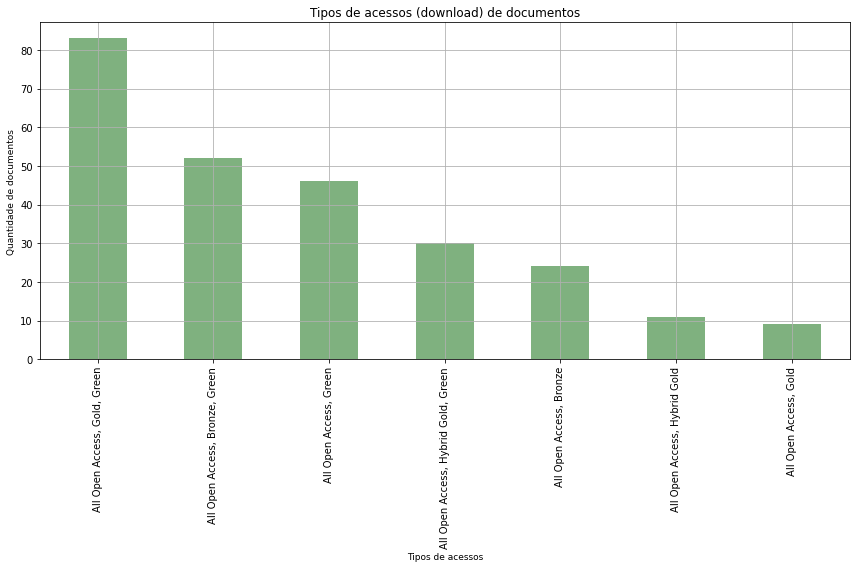

In [70]:
# variáveis
titulo = 'Tipos de acessos (download) de documentos'
eixo_x = 'Tipos de acessos'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'tipo-acesso-documento-'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
acesso_livre.size().sort_values(ascending=False).plot.bar(linestyle='--', linewidth=300, color='DarkGreen', alpha = 0.5)
#plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
plt.grid(True)

#salvar imagens
#plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

### Analisando tipos de documentos

In [71]:
# Groupby by
tipo_documento = df_scopus.groupby("tipo_documento")

# Summary statistic of all
tipo_documento.describe()

ano                                                  \
                   count         mean       std     min      25%     50%   
tipo_documento                                                             
Article            327.0  2016.192661  4.872882  1992.0  2014.00  2018.0   
Book                 1.0  2014.000000       NaN  2014.0  2014.00  2014.0   
Book Chapter         7.0  2017.000000  2.708013  2013.0  2015.00  2018.0   
Conference Paper   157.0  2015.796178  3.549537  2005.0  2014.00  2016.0   
Conference Review    3.0  2015.333333  5.686241  2009.0  2013.00  2017.0   
Editorial            1.0  2015.000000       NaN  2015.0  2015.00  2015.0   
Note                 2.0  2019.500000  2.121320  2018.0  2018.75  2019.5   
Review              25.0  2017.480000  4.709211  2003.0  2016.00  2019.0   

                                   quantidade_paginas         ... fim_pagina_  \
                       75%     max              count   mean  ...         75%   
tipo_documento                                                ...               
Article            2020.00  2022.0                0.0    NaN  ...       569.5   
Book               2014.00  2014.0                0.0    NaN  ...       264.0   
Book Chapter       2019.00  2020.0                0.0    NaN  ...       626.5   
Conference Paper   2018.00  2022.0                1.0   11.0  ...       496.0   
Conference Review  2018.50  2020.0                2.0  971.0  ...        66.0   
Editorial          2015.00  2015.0                0.0    NaN  ...       291.0   
Note               2020.25  2021.0                0.0    NaN  ...        64.5   
Review             2021.00  2022.0                0.0    NaN  ...       463.0   

                          quantidade_paginas_                                \
                      max               count        mean        std    min   
tipo_documento                                                                
Article            4809.0               327.0    6.577982   5.069989    1.0   
Book                264.0                 1.0  264.000000        NaN  264.0   
Book Chapter       1000.0                 7.0   14.142857   7.712081    5.0   
Conference Paper   6096.0               157.0    6.694268   3.847514    1.0   
Conference Review   132.0                 3.0   44.666667  75.632885    1.0   
Editorial           291.0                 1.0    4.000000        NaN    4.0   
Note                 86.0                 2.0    7.500000   9.192388    1.0   
Review             2607.0                25.0    8.000000   6.745369    1.0   

                                                 
                      25%    50%     75%    max  
tipo_documento                                   
Article              1.00    7.0   10.00   25.0  
Book               264.00  264.0  264.00  264.0  
Book Chapter         9.50   11.0   19.50   25.0  
Conference Paper     5.00    6.0    9.00   27.0  
Conference Review    1.00    1.0   66.50  132.0  
Editorial            4.00    4.0    4.00    4.0  
Note                 4.25    7.5   10.75   14.0  
Review               1.00    7.0   12.00   27.0  

[8 rows x 128 columns]

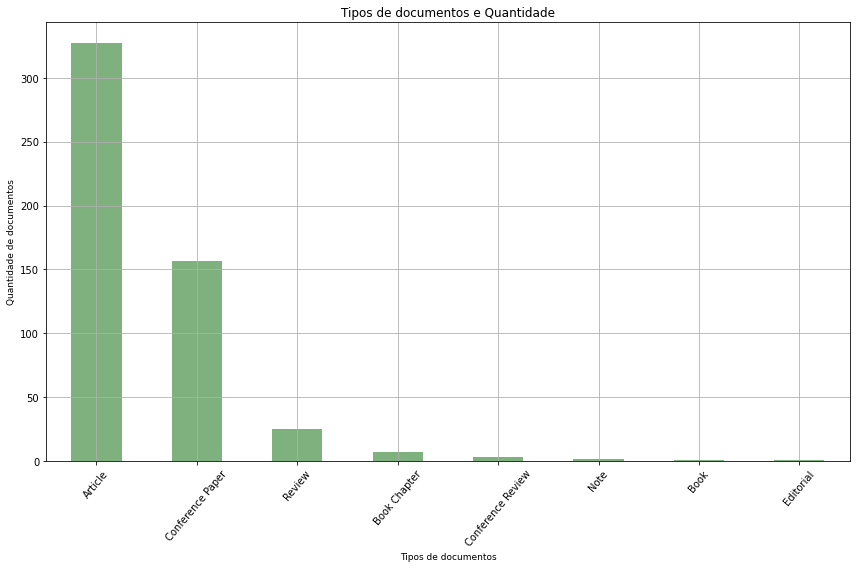

In [72]:
# variáveis
titulo = 'Tipos de documentos e Quantidade'
eixo_x = 'Tipos de documentos'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'tipo-documento-'+dataFormatada

# gráficos
fig, ax = plt.subplots(figsize=(12,8))
tipo_documento.size().sort_values(ascending=False).plot.bar(linestyle='-', linewidth=300, color='DarkGreen', alpha = 0.5)
plt.xticks(rotation=50)

# legendas
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
plt.grid(True)

# salvar figura
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

### Analisando Locais de Conferencia

In [73]:
# Groupby by
local_conferencia = df_scopus.groupby("local_conferencia")

# Summary statistic of all
local_conferencia.describe()

ano                                                       \
                  count    mean  std     min     25%     50%     75%     max   
local_conferencia                                                              
Amsterdam           1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Arlington, VA       1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Boston, MA          1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Brisbane, QLD       1.0  2007.0  NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Copenhagen          4.0  2013.0  0.0  2013.0  2013.0  2013.0  2013.0  2013.0   
Daejeon             1.0  2008.0  NaN  2008.0  2008.0  2008.0  2008.0  2008.0   
Dallas, TX          1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Gaithersburg, MD    1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Geneva              1.0  2005.0  NaN  2005.0  2005.0  2005.0  2005.0  2005.0   
Hangzhou            1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Huelva              1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Jeju                1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Maastricht          1.0  2006.0  NaN  2006.0  2006.0  2006.0  2006.0  2006.0   
Maui, HI            1.0  2012.0  NaN  2012.0  2012.0  2012.0  2012.0  2012.0   
Niagara Falls, NY   1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Niagara Falls, ON   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Oslo                1.0  2011.0  NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Perth               1.0  2010.0  NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Pisa                2.0  2012.0  0.0  2012.0  2012.0  2012.0  2012.0  2012.0   
Saarbrucken         1.0  2009.0  NaN  2009.0  2009.0  2009.0  2009.0  2009.0   
San Francisco, CA   1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Singapore           1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Turin               1.0  2013.0  NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Verona              2.0  2009.0  0.0  2009.0  2009.0  2009.0  2009.0  2009.0   

                  quantidade_paginas         ... fim_pagina_         \
                               count   mean  ...         75%    max   
local_conferencia                            ...                      
Amsterdam                        0.0    NaN  ...      246.00  246.0   
Arlington, VA                    0.0    NaN  ...      496.00  496.0   
Boston, MA                       0.0    NaN  ...       77.00   77.0   
Brisbane, QLD                    0.0    NaN  ...      549.00  549.0   
Copenhagen                       0.0    NaN  ...      599.75  686.0   
Daejeon                          0.0    NaN  ...      353.00  353.0   
Dallas, TX                       0.0    NaN  ...      280.00  280.0   
Gaithersburg, MD                 1.0   11.0  ...        0.00    0.0   
Geneva                           0.0    NaN  ...      828.00  828.0   
Hangzhou                         0.0    NaN  ...      443.00  443.0   
Huelva                           0.0    NaN  ...       74.00   74.0   
Jeju                             0.0    NaN  ...       29.00   29.0   
Maastricht                       0.0    NaN  ...      844.00  844.0   
Maui, HI                         0.0    NaN  ...       32.00   32.0   
Niagara Falls, NY                0.0    NaN  ...      329.00  329.0   
Niagara Falls, ON                0.0    NaN  ...      947.00  947.0   
Oslo                             0.0    NaN  ...      798.00  798.0   
Perth                            0.0    NaN  ...      461.00  461.0   
Pisa                             0.0    NaN  ...      221.25  239.0   
Saarbrucken                      0.0    NaN  ...      102.00  102.0   
San Francisco, CA                0.0    NaN  ...       30.00   30.0   
Singapore                        0.0    NaN  ...      307.00  307.0   
Turin                            0.0    NaN  ...      238.00  238.0   
Verona       

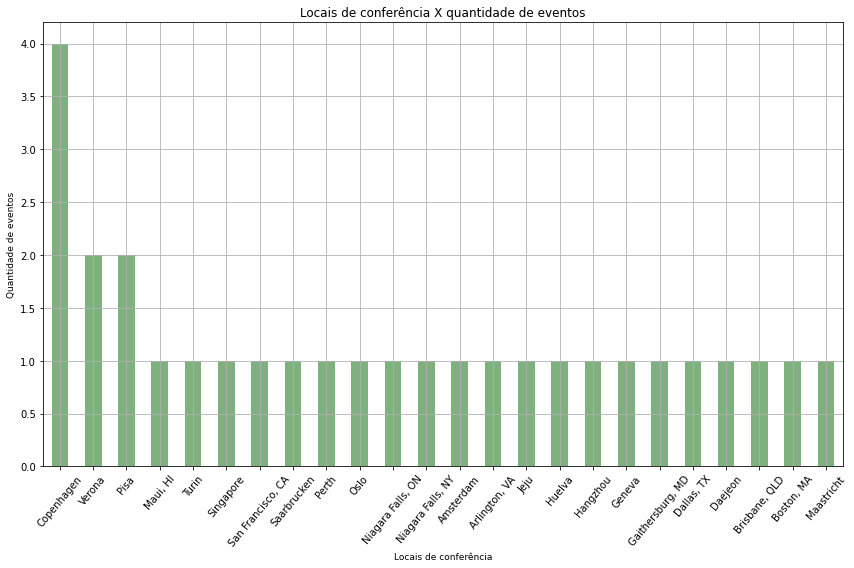

In [74]:
# variáveis
titulo = 'Locais de conferência X quantidade de eventos'
eixo_x = 'Locais de conferência'
eixo_y = 'Quantidade de eventos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'locais-conferencia-'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
local_conferencia.size().sort_values(ascending=False).plot.bar(linestyle='--', linewidth=300, color='DarkGreen', alpha = 0.5)
plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
plt.grid(True)

plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

### Analisando Editores

In [75]:
# Groupby by
editor = df_scopus.groupby("editor")

# Summary statistic of all
editor.describe()

ano               \
                                                   count         mean   
editor                                                                  
Academic Press Inc.                                 42.0  2016.976190   
Adis                                                 5.0  2020.600000   
American Academy of Allergy, Asthma and Immunology   3.0  2019.333333   
American College of Physicians                       1.0  2017.000000   
American Society of Clinical Oncology                2.0  2020.000000   
...                                                  ...          ...   
Weston Medical Publishing                            1.0  2015.000000   
Wiley-Blackwell Publishing Ltd                       1.0  2018.000000   
World Scientific Publishing Co. Pte Ltd              3.0  2016.666667   
Wuhan University                                     1.0  2016.000000   
eLife Sciences Publications Ltd                      1.0  2017.000000   

                                                                              \
                                                         std     min     25%   
editor                                                                         
Academic Press Inc.                                 3.338527  2003.0  2015.0   
Adis                                                1.140175  2019.0  2020.0   
American Academy of Allergy, Asthma and Immunology  2.081666  2017.0  2018.5   
American College of Physicians                           NaN  2017.0  2017.0   
American Society of Clinical Oncology               0.000000  2020.0  2020.0   
...                                                      ...     ...     ...   
Weston Medical Publishing                                NaN  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                           NaN  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             1.154701  2016.0  2016.0   
Wuhan University                                         NaN  2016.0  2016.0   
eLife Sciences Publications Ltd                          NaN  2017.0  2017.0   

                                                                            \
                                                       50%     75%     max   
editor                                                                       
Academic Press Inc.                                 2017.0  2019.0  2022.0   
Adis                                                2021.0  2021.0  2022.0   
American Academy of Allergy, Asthma and Immunology  2020.0  2020.5  2021.0   
American College of Physicians                      2017.0  2017.0  2017.0   
American Society of Clinical Oncology               2020.0  2020.0  2020.0   
...                                                    ...     ...     ...   
Weston Medical Publishing                           2015.0  2015.0  2015.0   
Wiley-Blackwell Publishing Ltd                      2018.0  2018.0  2018.0   
World Scientific Publishing Co. Pte Ltd             2016.0  2017.0  2018.0   
Wuhan University                                    2016.0  2016.0  2016.0   
eLife Sciences Publications Ltd                     2017.0  2017.0  2017.0   

                                                   quantidade_paginas       \
                                                                count mean   
editor                                                                       
Academic Press Inc.                                               0.0  NaN   
Adis                                                              0.0  NaN   
American Academy of Allergy, Asthma and Immunology                0.0  NaN   
American College of Physicians                                    0.0  NaN   
American Society of Clinical Oncology                             0.0  NaN   
...                                                               ...  ...   
Weston Medical Publishing                                         0.0  NaN   
Wiley-Blackwell Publishing Ltd      

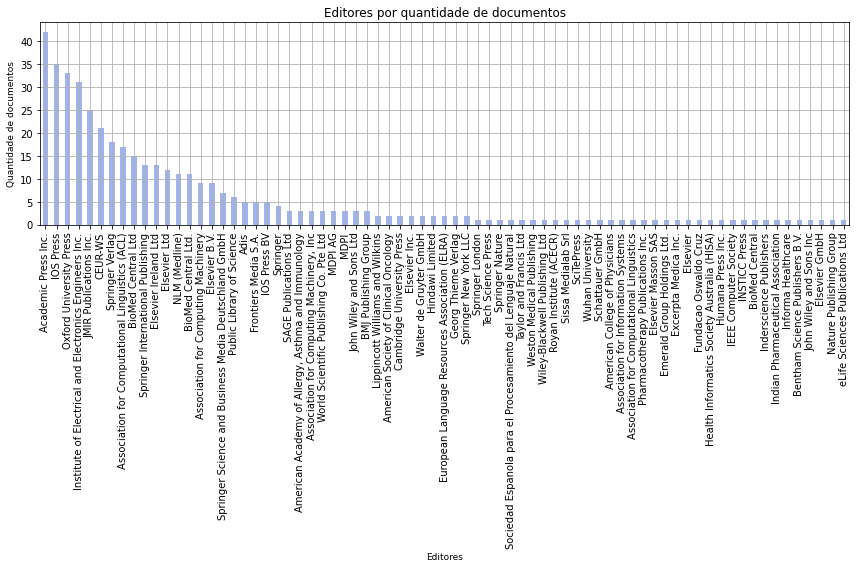

In [76]:
# variáveis
titulo = 'Editores por quantidade de documentos'
eixo_x = 'Editores'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'editor-'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
editor.size().sort_values(ascending=False).plot.bar(linestyle='--', linewidth=300, color = "royalblue", alpha = 0.5)
#plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
plt.grid(True)

#salvar imagens
#plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

### Analisando documentos por Ano

In [77]:
# Groupby by
ano = df_scopus.groupby("ano")

# Summary statistic of all
ano.describe()

quantidade_paginas                                                      \
                  count    mean std     min     25%     50%     75%     max   
ano                                                                           
1992                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2000                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2001                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2003                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2004                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2005                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2006                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2007                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2008                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2009                1.0   448.0 NaN   448.0   448.0   448.0   448.0   448.0   
2010                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2011                1.0    11.0 NaN    11.0    11.0    11.0    11.0    11.0   
2012                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2013                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2014                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2015                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2016                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2017                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2018                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2019                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2020                1.0  1494.0 NaN  1494.0  1494.0  1494.0  1494.0  1494.0   
2021                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   
2022                0.0     NaN NaN     NaN     NaN     NaN     NaN     NaN   

     quantidade_citacoes               ... fim_pagina_          \
                   count         mean  ...         75%     max   
ano                                    ...                       
1992                 1.0    30.000000  ...      896.00   896.0   
2000                 1.0    22.000000  ...      153.00   153.0   
2001                 1.0  1339.000000  ...       21.00    21.0   
2003                 3.0   138.000000  ...      437.00   533.0   
2004                 4.0    13.500000  ...      578.00   767.0   
2005                 5.0    14.800000  ...      828.00  2066.0   
2006                 6.0    38.666667  ...      658.25   844.0   
2007                 4.0     9.750000  ...      321.75   549.0   
2008                10.0    24.700000  ...      564.75   691.0   
2009                 7.0    47.428571  ...      351.25  2083.0   
2010                16.0    23.750000  ...      601.00   913.0   
2011                15.0    35.133333  ...      718.00  1279.0   
2012                15.0    32.000000  ...      766.00  1253.0   
2013                25.0    23.200000  ...      695.25   961.0   
2014                32.0    29.906250  ...      511.50  1069.0   
2015                40.0    38.125000  ...      392.00  1788.0   
2016                28.0    38.107143  ...      520.00  2028.0   
2017                49.0    22.734694  ...      481.50  1953.0   
2018                48.0    15.833333  ...      410.00  4809.0   
2019                51.0    11.803922  ...      469.50  6096.0   
2020                47.0     8.170213  ...      324.00  2931.0   
2021                34.0     2.411765  ...      422.50  3020.0   
2022                 3.0     1.333333  ...      140.25  2123.0   

     quantidade_paginas_                                                  \
                   count       mean        std   min    25%   50%    75%   
ano                                                                        
1992 

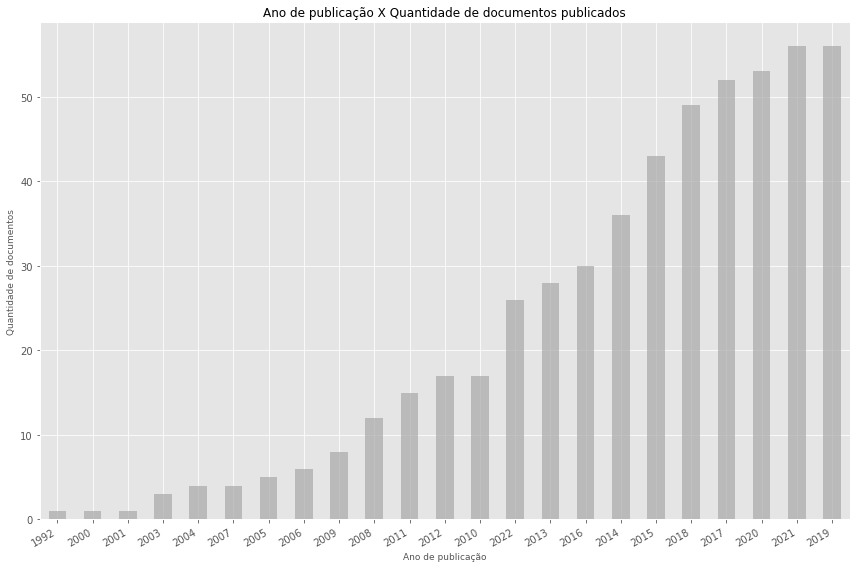

In [78]:
## Ordenar por ano ##777
# variáveis
titulo = 'Ano de publicação X Quantidade de documentos publicados'
eixo_x = 'Ano de publicação'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'ano_publicacao-'+dataFormatada

#gráfico
plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(12,8))
ano.size().sort_values(ascending=True).plot.bar(linestyle='--', linewidth=300, color='DarkGray', alpha = 0.7)
#plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.gcf().autofmt_xdate() ## neste caso nao é uma data
plt.grid(True)

#salvar imagens
#plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.savefig(image+extensao_arquivo, dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

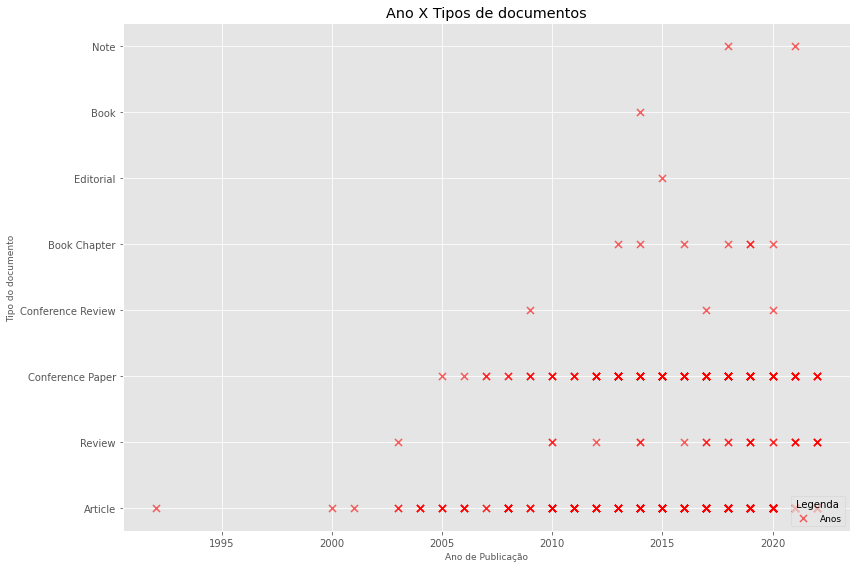

In [79]:
# gerando o grafico de dispersao para analise preliminar dos dados
# variáveis
titulo = 'Ano X Tipos de documentos'
eixo_x = 'Ano de Publicação'
eixo_y = 'Tipo do documento'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'ano-publicacao-dispersao-'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(df_scopus['ano'], df_scopus['tipo_documento'], color='red', marker='x', s=50, label='Anos', alpha=0.6)

#legendas
ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
#plt.grid(True) 

#salvar imagens
#plt.savefig(image, dpi=300)
plt.tight_layout() ## ver se é necessário
plt.show()

### Analisando os idiomas

In [80]:
# Groupby by
idioma = df_scopus.groupby("idioma_original")

# Summary statistic of all
idioma.describe().head()

ano                                                         \
                 count         mean       std     min     25%     50%     75%   
idioma_original                                                                 
English          521.0  2016.153551  4.476803  1992.0  2014.0  2017.0  2020.0   
French             1.0  2011.000000       NaN  2011.0  2011.0  2011.0  2011.0   
Spanish            1.0  2018.000000       NaN  2018.0  2018.0  2018.0  2018.0   

                        quantidade_paginas         ... fim_pagina_          \
                    max              count   mean  ...         75%     max   
idioma_original                                    ...                       
English          2022.0                3.0  651.0  ...       539.0  6096.0   
French           2011.0                0.0    NaN  ...       161.0   161.0   
Spanish          2018.0                0.0    NaN  ...        36.0    36.0   

                quantidade_paginas_                                           \
                              count     mean        std  min  25%  50%   75%   
idioma_original                                                                
English                       521.0  7.50096  13.465929  1.0  1.0  7.0  10.0   
French                          1.0  4.00000        NaN  4.0  4.0  4.0   4.0   
Spanish                         1.0  6.00000        NaN  6.0  6.0  6.0   6.0   

                        
                   max  
idioma_original         
English          264.0  
French             4.0  
Spanish            6.0  

[3 rows x 128 columns]

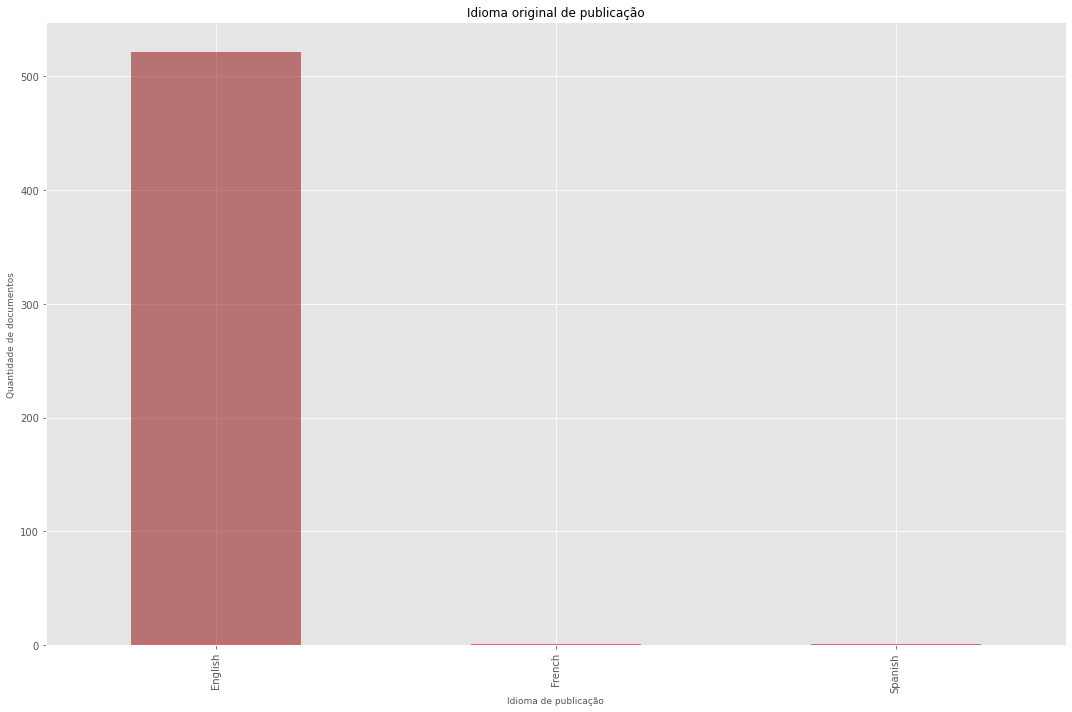

In [82]:
## aqui o ideal é ter o valor na barra
# variáveis
titulo = 'Idioma original de publicação'
eixo_x = 'Idioma de publicação'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'idioma-publicaco-'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(15,10))
idioma.size().sort_values(ascending=False).plot.bar(linestyle='--', linewidth=300, color='DarkRed', alpha = 0.5)
#plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
plt.grid(True)

#salvar imagens
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

### Criar uma visão da quantidade de documentos agrupados por quantidade de páginas + o total de páginas

### Seaborn - colunas x colunas

 ### Nuvem de Palavras

#### Nuvem de Palavras dos Títulos

In [83]:
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [84]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_titulo = df_scopus['titulo_documento'].str.lower()
palavras_titulo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


95     development of a questionnaire for detecting p...
129    the use of a medical dictionary for regulatory...
0      effective mapping of biomedical text to the um...
3      detecting adverse events using information tec...
63     towards linking patients and clinical informat...
                             ...                        
457    identification of hand foot syndrome from canc...
468    antipsychotic polypharmacy and adverse drug re...
467    on the road to explainable ai in drug drug int...
456    artificial intelligence in pharmacovigilance a...
455    monitoring user opinions and side effects on c...
Name: titulo_documento, Length: 523, dtype: object

In [85]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_titulo = " ".join(s for s in palavras_titulo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [86]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo)} e seu tipo atual é {type(wordcloud_palavras_titulo)}')

Quantidade de palavras no corpus: 50642 e seu tipo atual é <class 'str'>


In [87]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo)

Criação da nuvem de palavras sem tratamento nos textos


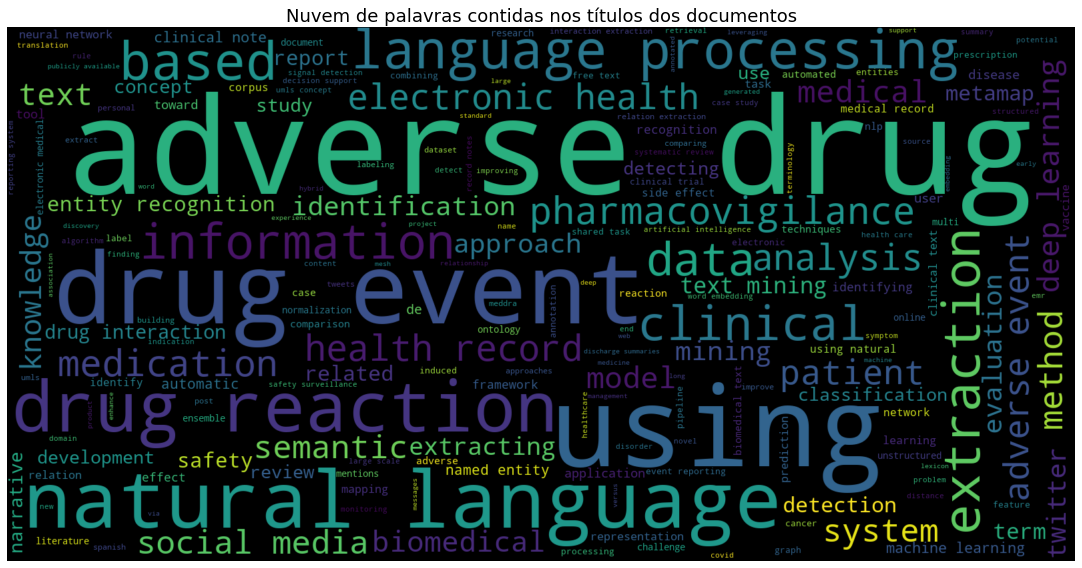

In [88]:
# variáveis
titulo = 'Nuvem de palavras contidas nos títulos dos documentos'
#eixo_x = ''
#eixo_y = ''
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'wordcloud_titulo_scopus-'+dataFormatada


#gráfico
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud_titulo, interpolation='bilinear')
ax.set_axis_off()         

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)
#plt.grid(True)

#salvar imagens
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

#### Nuvem de Palavras dos Resumos

In [89]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_resumo = df_scopus['resumo'].str.lower()
palavras_resumo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


95     objective: to develop a comprehensive list of ...
129    the medical dictionary for regulatory activiti...
0      the umls metathesaurus, the largest thesaurus ...
3      context: although patient safety is a major pr...
63     the purpose of this project is to explore the ...
                             ...                        
457    early detection and management of adverse drug...
468    background antipsychotic polypharmacy (app) oc...
467    over the past decade, polypharmacy instances h...
456    the tools of artificial intelligence (ai) have...
455    background: in the current phase of the covid-...
Name: resumo, Length: 523, dtype: object

In [90]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_resumo = " ".join(s for s in palavras_resumo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [91]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_resumo)} e seu tipo atual é{type(wordcloud_palavras_resumo)}')

Quantidade de palavras no corpus: 774035 e seu tipo atual é<class 'str'>


In [92]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_resumo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_resumo)

Criação da nuvem de palavras sem tratamento nos textos


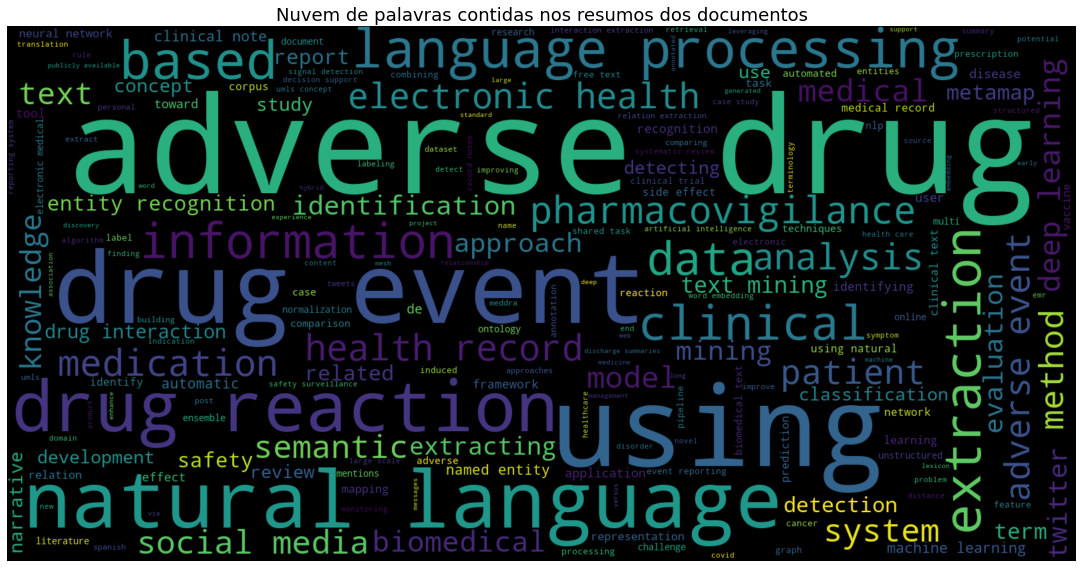

In [94]:
# variáveis
titulo = 'Nuvem de palavras contidas nos resumos dos documentos'
#eixo_x = ''
#eixo_y = ''
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'wordcloud_resumo_scopus-'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud_titulo, interpolation='bilinear')
ax.set_axis_off()         

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)
#plt.grid(True)

#salvar imagens
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

## Exportação do resultado para Excel

In [95]:
## Gerar planilha com colunas especificas
#resultado_scopus = os.path.join('../data','scopus-08-06-2022.csv')
#resultado_scopus = os.path.join('../data','resultado_scopus-26-06-2022.xlsx')
resultado_scopus = os.path.join('../data','resultado_scopus_'+dataFormatada+'.xlsx')
sheetname="base_scopus"

df_xlsx_scopus = pd.DataFrame(df_scopus, columns = [
       'issn_scopus','titulo_documento', 'ano','quantidade_citacoes', 'tipo_documento', 'nome_conferencia',
       'editores', 'patrocinadores', 'editor',
       'autores', 'id_autores', 'titulo_fonte',
       'volume', 'publicado', 'numero_documento',
       'inicio_pagina', 'fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_',
       'doi', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes',
       'detalhes_financiamento', 'texto_financiamento_1','texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4','texto_financiamento_5', 'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8','texto_financiamento_9', 'texto_financiamento_10',
       'referencias', 'endereco_correspondencia', 
       'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid'
    ,])
df_xlsx_scopus = df_xlsx_scopus.to_excel(resultado_scopus, sheet_name=sheetname, index=False, encoding='utf-8', header=True)

# Carga de arquivo -  PubMed

In [96]:
print('Carga e Visualização do dataframe')
arquivo_base_pubmed = os.path.join('../data','pubmed-csv-naturallan-set-2022.csv')
raw_data_pubmed = pd.read_csv(arquivo_base_pubmed, sep=",", delimiter=None, encoding='utf-8')
raw_data_pubmed.head(3)

Carga e Visualização do dataframe


,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI
0,34653809,Automation of penicillin adverse drug reaction...,"Inglis JM, Bacchi S, Troelnikov A, Smith W, Sh...",Int J Med Inform. 2021 Dec;156:104611. doi: 10...,Inglis JM,Int J Med Inform,2021,2021/10/15,NaN,NaN,10.1016/j.ijmedinf.2021.104611
1,34406803,Customizable Natural Language Processing Bioma...,"Holmes B, Chitale D, Loving J, Tran M, Subrama...",JCO Clin Cancer Inform. 2021 Aug;5:833-841. do...,Holmes B,JCO Clin Cancer Inform,2021,2021/08/18,NaN,NaN,10.1200/CCI.21.00017
2,28643174,Natural Language Processing for EHR-Based Phar...,"Luo Y, Thompson WK, Herr TM, Zeng Z, Berendsen...",Drug Saf. 2017 Nov;40(11):1075-1089. doi: 10.1...,Luo Y,Drug Saf,2017,2017/06/24,NaN,NaN,10.1007/s40264-017-0558-6


## Análise do dataframe - PUBMED

### Colunas, dados nulos e tipos de dados

In [97]:
print('Verificando tipos e se tem dados nulos')
raw_data_pubmed.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   PMID              188 non-null    int64 
 1   Title             188 non-null    object
 2   Authors           188 non-null    object
 3   Citation          188 non-null    object
 4   First Author      188 non-null    object
 5   Journal/Book      188 non-null    object
 6   Publication Year  188 non-null    int64 
 7   Create Date       188 non-null    object
 8   PMCID             134 non-null    object
 9   NIHMS ID          20 non-null     object
 10  DOI               158 non-null    object
dtypes: int64(2), object(9)
memory usage: 16.3+ KB


### Quantidade de conteúdo único para cada coluna

In [98]:
raw_data_pubmed.nunique()

PMID                188
Title               187
Authors             185
Citation            188
First Author        165
Journal/Book         63
Publication Year     20
Create Date         173
PMCID               134
NIHMS ID             20
DOI                 158
dtype: int64

### Quantidade de conteúdo nulo para cada coluna

In [99]:
# verificar campos nulos
raw_data_pubmed.isnull().sum()

PMID                  0
Title                 0
Authors               0
Citation              0
First Author          0
Journal/Book          0
Publication Year      0
Create Date           0
PMCID                54
NIHMS ID            168
DOI                  30
dtype: int64

### Resumo Estatístico de Campos Numéricos

In [100]:
raw_data_pubmed.describe()

,PMID,Publication Year
count,1.880000e+02,188.000000
mean,2.925529e+07,2017.196809
std,4.823380e+06,4.122274
min,1.182515e+07,2001.000000
25%,2.653983e+07,2015.000000
50%,3.000997e+07,2018.000000
75%,3.291973e+07,2020.000000
max,3.561223e+07,2022.000000


## Manutenção de dados

In [101]:
## Verificar se os dataframes nao s"ao espelhos
df_pubmed = raw_data_pubmed.copy()
print(id(df_pubmed), id(raw_data_pubmed))

1860187017936 1860186504928


### Ajustar nome das Colunas

In [102]:
print('Verificar colunas')
df_pubmed.columns

Verificar colunas


Index(['PMID', 'Title', 'Authors', 'Citation', 'First Author', 'Journal/Book',
       'Publication Year', 'Create Date', 'PMCID', 'NIHMS ID', 'DOI'],
      dtype='object')

In [103]:
columns_pubmed = {
    'PMID':'id_pubmed',
    'Title':'titulo_documento',
    'Authors':'autores_pubmed',
    'Citation':'citacao_pubmed',
    'First Author':'primeiro_autor_pubmed',
    'Journal/Book':'jornal_book_pubmed',
    'Publication Year':'ano_publicacao_pubmed',
    'Create Date':'data_criacao_pubmed', 
    'PMCID':'id_pmc_pubmed', 
    'NIHMS ID':'id_nihms_pubmed', 
    'DOI':'doi_pubmed',
}

In [104]:
df_pubmed = df_pubmed.rename(columns=columns_pubmed)
df_pubmed.head(2)

,id_pubmed,titulo_documento,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed
0,34653809,Automation of penicillin adverse drug reaction...,"Inglis JM, Bacchi S, Troelnikov A, Smith W, Sh...",Int J Med Inform. 2021 Dec;156:104611. doi: 10...,Inglis JM,Int J Med Inform,2021,2021/10/15,NaN,NaN,10.1016/j.ijmedinf.2021.104611
1,34406803,Customizable Natural Language Processing Bioma...,"Holmes B, Chitale D, Loving J, Tran M, Subrama...",JCO Clin Cancer Inform. 2021 Aug;5:833-841. do...,Holmes B,JCO Clin Cancer Inform,2021,2021/08/18,NaN,NaN,10.1200/CCI.21.00017


### Criação de colunas

In [105]:
## criar uma coluna fonte com valor = pubmed
df_pubmed['fonte']='PubMed' # variavel para receber a base indexada do documento

In [106]:
df_pubmed["doi"] = df_pubmed["doi_pubmed"]

In [107]:
df_pubmed["titulo_documento_pubmed"] = df_pubmed["titulo_documento"]

### Ajuste de textos de algumas colunas para minúsculo (lower)

In [108]:
df_pubmed["titulo_documento"] = df_pubmed["titulo_documento"].str.lower()
df_pubmed["doi"] = df_pubmed["doi"].str.lower()

### Remover caracteres especiais

In [109]:
df_pubmed["titulo_documento"] = df_pubmed["titulo_documento"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

In [110]:
df_pubmed.loc[:,'titulo_documento'] = df_pubmed['titulo_documento'].apply(limpar_campo)

In [111]:
df_pubmed['titulo_documento'] = df_pubmed['titulo_documento'].str.replace('  ', ' ')

### Remoção de espaços de textos de algumas colunas (strip)

In [112]:
df_pubmed["titulo_documento"] = df_pubmed["titulo_documento"].str.strip()

### Ajustar tipagem de dados

In [113]:
print('Ajustar tipagem dos dados')
df_pubmed['jornal_book_pubmed'] = df_pubmed['jornal_book_pubmed'].astype('category')

Ajustar tipagem dos dados


## Exclusão de documentos duplicados

In [114]:
# Ordenando para excluir primeiro as duplicidades
df_pubmed = df_pubmed.sort_values(['ano_publicacao_pubmed','doi_pubmed','titulo_documento'])
df_pubmed[['doi_pubmed','titulo_documento']]

,doi_pubmed,titulo_documento
139,NaN,effective mapping of biomedical text to the um...
165,10.1016/j.jbi.2003.09.017,towards linking patients and clinical informat...
183,NaN,linguistic analysis terms and phrases used by ...
160,NaN,comparing natural language processing tools to...
180,NaN,evaluation of medical problem extraction from ...
...,...,...
163,10.3233/SHTI220615,named entity recognition in pubmed abstracts f...
88,10.3390/pharmaceutics14020266,using machine learning for pharmacovigilance a...
178,10.3390/vaccines10010103,using a machine learning approach to monitor c...
186,NaN,clinical note section detection using a hidden...


In [115]:
# 1 documentos duplicados
df_pubmed.titulo_documento.value_counts()

semantic processing to identify adverse drug event information from black box warnings                                                                      2
effective mapping of biomedical text to the umls metathesaurus the metamap program                                                                          1
ensemble method based extraction of medication and related information from clinical texts                                                                  1
patient reported outcomes in online communications on statins memory and cognition qualitative analysis using online communities                            1
fine tuning bidirectional encoder representations from transformers (bert) based models on large scale electronic health record notes an empirical study    1
                                                                                                                                                           ..
deep learning for pharmacovigilance recurrent neural

In [116]:
''' estranho, tem dois artigos, o de 2014 parece ser mais completo, ficando com ele
links:
2013 - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3900176/
2014 - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4419903/

'''

df_pubmed.query('titulo_documento == "semantic processing to identify adverse drug event information from black box warnings" ')[['id_pubmed', 'titulo_documento','ano_publicacao_pubmed', 'doi_pubmed','doi']]

,id_pubmed,titulo_documento,ano_publicacao_pubmed,doi_pubmed,doi
161,24551335,semantic processing to identify adverse drug e...,2013,NaN,NaN
34,25954348,semantic processing to identify adverse drug e...,2014,NaN,NaN


In [117]:
df_pubmed = df_pubmed.drop_duplicates(['titulo_documento','doi_pubmed'], keep='last') ## de 188 para [187 rows x 14 columns]
print(df_pubmed)

     id_pubmed                                   titulo_documento  \
139   11825149  effective mapping of biomedical text to the um...   
165   14643729  towards linking patients and clinical informat...   
183   15360865  linguistic analysis terms and phrases used by ...   
160   16779095  comparing natural language processing tools to...   
180   16160360  evaluation of medical problem extraction from ...   
..         ...                                                ...   
163   35612234  named entity recognition in pubmed abstracts f...   
88    35213998  using machine learning for pharmacovigilance a...   
178   35062764  using a machine learning approach to monitor c...   
186   35308919  clinical note section detection using a hidden...   
169   35308927  reducing physicians' cognitive load during cha...   

                                        autores_pubmed  \
139                                        Aronson AR.   
165                            Brennan PF, Aronson AR. 

In [118]:
df_pubmed.query('titulo_documento == "semantic processing to identify adverse drug event information from black box warnings" ')[['id_pubmed', 'titulo_documento','ano_publicacao_pubmed', 'doi']]

,id_pubmed,titulo_documento,ano_publicacao_pubmed,doi
34,25954348,semantic processing to identify adverse drug e...,2014,NaN


 ## Reanálise do dataframe

In [119]:
print('Verificando tipos e se tem dados nulos')
df_pubmed.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 187 entries, 139 to 169
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id_pubmed                187 non-null    int64   
 1   titulo_documento         187 non-null    object  
 2   autores_pubmed           187 non-null    object  
 3   citacao_pubmed           187 non-null    object  
 4   primeiro_autor_pubmed    187 non-null    object  
 5   jornal_book_pubmed       187 non-null    category
 6   ano_publicacao_pubmed    187 non-null    int64   
 7   data_criacao_pubmed      187 non-null    object  
 8   id_pmc_pubmed            133 non-null    object  
 9   id_nihms_pubmed          20 non-null     object  
 10  doi_pubmed               158 non-null    object  
 11  fonte                    187 non-null    object  
 12  doi                      158 non-null    object  
 13  titulo_documento_pubmed 

In [120]:
df_pubmed.nunique()

id_pubmed                  187
titulo_documento           187
autores_pubmed             185
citacao_pubmed             187
primeiro_autor_pubmed      165
jornal_book_pubmed          63
ano_publicacao_pubmed       20
data_criacao_pubmed        173
id_pmc_pubmed              133
id_nihms_pubmed             20
doi_pubmed                 158
fonte                        1
doi                        158
titulo_documento_pubmed    187
dtype: int64

In [121]:
df_pubmed.isnull().sum()

id_pubmed                    0
titulo_documento             0
autores_pubmed               0
citacao_pubmed               0
primeiro_autor_pubmed        0
jornal_book_pubmed           0
ano_publicacao_pubmed        0
data_criacao_pubmed          0
id_pmc_pubmed               54
id_nihms_pubmed            167
doi_pubmed                  29
fonte                        0
doi                         29
titulo_documento_pubmed      0
dtype: int64

In [122]:
print('Resumo Estatístico de Campos Numéricos')
df_pubmed['ano_publicacao_pubmed'].describe()

Resumo Estatístico de Campos Numéricos


count     187.000000
mean     2017.219251
std         4.121808
min      2001.000000
25%      2015.000000
50%      2018.000000
75%      2020.000000
max      2022.000000
Name: ano_publicacao_pubmed, dtype: float64

## Visualização

### Analisando documentos por Ano

In [123]:
ano_pubmed = df_pubmed.groupby("ano_publicacao_pubmed")
ano_pubmed.describe()

id_pubmed                                          \
                          count          mean           std         min   
ano_publicacao_pubmed                                                     
2001                        1.0  1.182515e+07           NaN  11825149.0   
2003                        1.0  1.464373e+07           NaN  14643729.0   
2004                        1.0  1.536086e+07           NaN  15360865.0   
2005                        2.0  1.646973e+07  4.375117e+05  16160360.0   
2006                        1.0  1.635993e+07           NaN  16359928.0   
2008                        2.0  1.899896e+07  1.329361e+02  18998862.0   
2009                        3.0  1.979178e+07  5.455761e+05  19261932.0   
2010                        5.0  2.137939e+07  1.359627e+06  20179584.0   
2011                        2.0  2.194041e+07  3.603147e+05  21685626.0   
2012                        4.0  2.427678e+07  3.163848e+06  22122057.0   
2013                        6.0  2.354632e+07  5.869371e+05  23043124.0   
2014                       11.0  2.512242e+07  4.218895e+05  24431333.0   
2015                       10.0  2.607361e+07  4.050733e+05  25451103.0   
2016                        8.0  2.751146e+07  6.476863e+05  26776215.0   
2017                       24.0  2.871028e+07  6.588765e+05  26851224.0   
2018                       21.0  3.000023e+07  3.815411e+05  29186491.0   
2019                       23.0  3.113712e+07  5.148127e+05  29994486.0   
2020                       19.0  3.251826e+07  6.204742e+05  31197355.0   
2021                       26.0  3.413025e+07  4.343688e+05  33006728.0   
2022                       17.0  3.530383e+07  3.035598e+05  34468999.0   

                                                                         
                               25%         50%          75%         max  
ano_publicacao_pubmed                                                    
2001                   11825149.00  11825149.0  11825149.00  11825149.0  
2003                   14643729.00  14643729.0  14643729.00  14643729.0  
2004                   15360865.00  15360865.0  15360865.00  15360865.0  
2005                   16315043.75  16469727.5  16624411.25  16779095.0  
2006                   16359928.00  16359928.0  16359928.00  16359928.0  
2008                   18998909.00  18998956.0  18999003.00  18999050.0  
2009                   19511749.50  19761567.0  20056698.00  20351829.0  
2010                   20406501.00  21346964.0  21347051.00  23616843.0  
2011                   21813016.50  21940407.0  22067797.50  22195188.0  
2012                   22565788.50  23009037.0  24720031.50  28967001.0  
2013                   23113767.00  23349732.0  23799059.25  24551357.0  
2014                   24893333.50  25046831.0  25322110.50  25954348.0  
2015                   25795609.00  26029773.0  26469570.50  26556646.0  
2016                   26964018.75  27557352.0  27848563.50  28664200.0  
2017                   28378793.50  28714776.0  29188289.25  29977659.0  
2018                   29860093.00  30009034.0  30262450.00  30591037.0  
2019                   30860167.00  31162134.0  31437957.50  31947235.0  
2020                   32430547.00  32570374.0  32854696.00  33380331.0  
2021                   33936443.75  34160910.5  34419146.50  34951601.0  
2022                   35175201.00  35342285.0  35579806.00  35612234.0

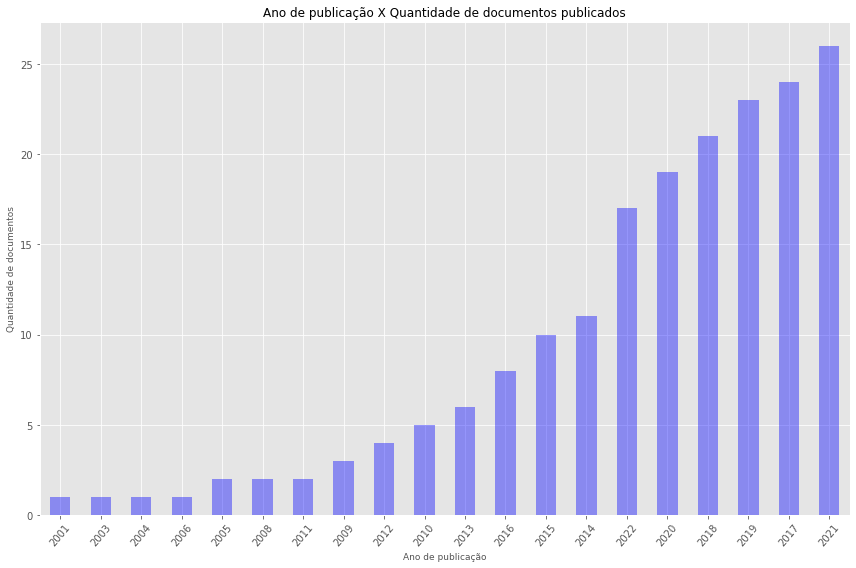

In [124]:
# variáveis
titulo = 'Ano de publicação X Quantidade de documentos publicados'
eixo_x = 'Ano de publicação'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'ano_publicacao_pubmed-'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(12,8))
ano_pubmed.size().sort_values(ascending=True).plot.bar(linestyle='--', linewidth=300, color='Blue', alpha = 0.4)
plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
plt.grid(True)

#salvar imagens
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

### Analisando documentos por Jornal

In [125]:
jornal_book_pubmed = df_pubmed.groupby("jornal_book_pubmed")
jornal_book_pubmed.describe()

id_pubmed                \
                                                      count          mean   
jornal_book_pubmed                                                          
AMIA Annu Symp Proc                                    17.0  2.613996e+07   
AMIA Jt Summits Transl Sci Proc                         1.0  3.247765e+07   
Annu Int Conf IEEE Eng Med Biol Soc                     1.0  3.194724e+07   
Appl Clin Inform                                        1.0  2.361684e+07   
Artif Intell Med                                        1.0  2.743104e+07   
...                                                     ...           ...   
Proceedings (IEEE Int Conf Bioinformatics Biomed)       1.0  2.997766e+07   
SHB12 (2012)                                            1.0  2.896700e+07   
Stud Health Technol Inform                             14.0  2.855665e+07   
Vaccines (Basel)                                        1.0  3.506276e+07   
Yearb Med Inform                                        2.0  2.647699e+07   

                                                                             \
                                                            std         min   
jornal_book_pubmed                                                            
AMIA Annu Symp Proc                                6.442278e+06  16779095.0   
AMIA Jt Summits Transl Sci Proc                             NaN  32477654.0   
Annu Int Conf IEEE Eng Med Biol Soc                         NaN  31947235.0   
Appl Clin Inform                                            NaN  23616843.0   
Artif Intell Med                                            NaN  27431037.0   
...                                                         ...         ...   
Proceedings (IEEE Int Conf Bioinformatics Biomed)           NaN  29977659.0   
SHB12 (2012)                                                NaN  28967001.0   
Stud Health Technol Inform                         6.297008e+06  15360865.0   
Vaccines (Basel)                                            NaN  35062764.0   
Yearb Med Inform                                   1.913804e+06  25123728.0   

                                                                            \
                                                           25%         50%   
jornal_book_pubmed                                                           
AMIA Annu Symp Proc                                21346964.00  24551357.0   
AMIA Jt Summits Transl Sci Proc                    32477654.00  32477654.0   
Annu Int Conf IEEE Eng Med Biol Soc                31947235.00  31947235.0   
Appl Clin Inform                                   23616843.00  23616843.0   
Artif Intell Med                                   27431037.00  27431037.0   
...                                                        ...         ...   
Proceedings (IEEE Int Conf Bioinformatics Biomed)  29977659.00  29977659.0   
SHB12 (2012)                                       28967001.00  28967001.0   
Stud Health Technol Inform                         28986190.75  30703247.0   
Vaccines (Basel)                                   35062764.00  35062764.0   
Yearb Med Inform                                   25800359.75  26476991.5   

                                                                            \
                                                           75%         max   
jornal_book_pubmed                                                           
AMIA Annu Symp Proc                                33936399.00  35308927.0   
AMIA Jt Summits Transl Sci Proc                    32477654.00  32477654.0   
Annu Int Conf IEEE Eng Med Biol Soc                31947235.00  31947235.0   
Appl Clin Inform                                   23616843.00  23616843.0   
Artif Intell Med                                   27431037.00  27431037.0   
...                                                        ...         ...   
Proceedings (IEEE Int Conf Bioinformatics Biomed)  29977659.00  29977

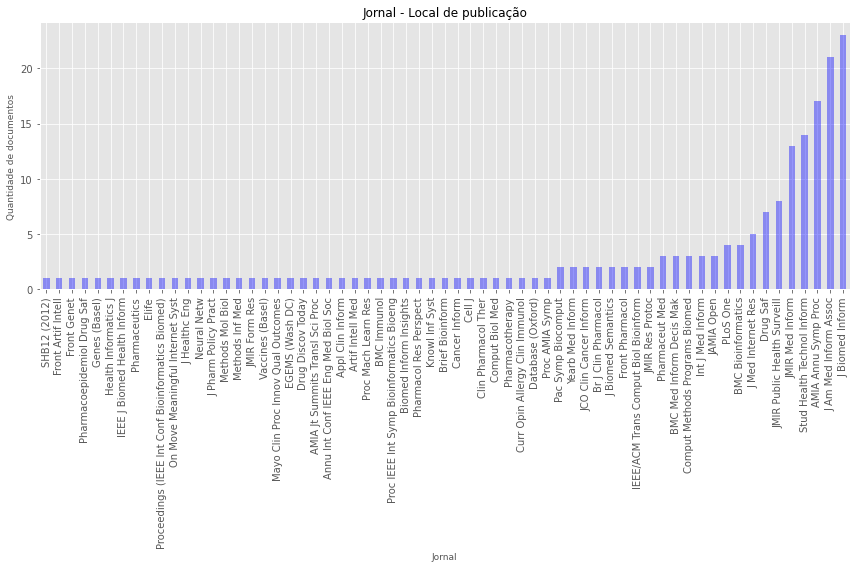

In [126]:
# variáveis
titulo = 'Jornal - Local de publicação'
eixo_x = 'Jornal'
eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'jornal_pubmed-'+dataFormatada

#gráfico
#plt.style.use("ggplot")
fig, ax = plt.subplots(figsize=(12,8))
jornal_book_pubmed.size().sort_values(ascending=True).plot.bar(linestyle='--', linewidth=300, color='Blue', alpha = 0.4)
#plt.xticks(rotation=50)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
ax.set_xlabel(eixo_x, fontsize=9)
ax.set_ylabel(eixo_y, fontsize=9)
# Organiza o eixo x de modo a facilitar a visulização dos dados
plt.grid(True)

#salvar imagens
plt.savefig(image+extensao_arquivo, dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

### Seaborn - colunas x colunas

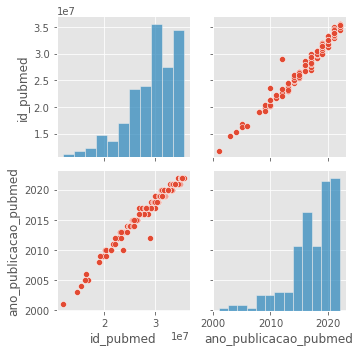

Visão geral em gráfico


In [127]:
# variáveis
titulo = 'Visão geral em gráfico'
#eixo_x = 'Jornal'
#eixo_y = 'Quantidade de documentos'
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'visao_geral_pubmed-'+dataFormatada

#gráfico
#plt.style.use("ggplot")
#fig, ax = plt.subplots(figsize=(12,8))
sns.pairplot(df_pubmed)

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=12)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)
# Organiza o eixo x de modo a facilitar a visulização dos dados
#plt.grid(True)

#salvar imagens
plt.savefig(image+extensao_arquivo, dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

print('Visão geral em gráfico')
#sns.pairplot(df_pubmed)

### Nuvem de Palavras

#### Nuvem de Palavras dos Títulos

In [128]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_titulo_pubmed = df_pubmed['titulo_documento'].str.lower()
palavras_titulo_pubmed

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


139    effective mapping of biomedical text to the um...
165    towards linking patients and clinical informat...
183    linguistic analysis terms and phrases used by ...
160    comparing natural language processing tools to...
180    evaluation of medical problem extraction from ...
                             ...                        
163    named entity recognition in pubmed abstracts f...
88     using machine learning for pharmacovigilance a...
178    using a machine learning approach to monitor c...
186    clinical note section detection using a hidden...
169    reducing physicians' cognitive load during cha...
Name: titulo_documento, Length: 187, dtype: object

In [129]:
wordcloud_palavras_titulo_pubmed = " ".join(s for s in palavras_titulo_pubmed)
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo_pubmed)} e seu tipo atual é{type(wordcloud_palavras_titulo_pubmed)}')

Quantidade de palavras no corpus: 19967 e seu tipo atual é<class 'str'>


In [130]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo_pubmed = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo_pubmed)

Criação da nuvem de palavras sem tratamento nos textos


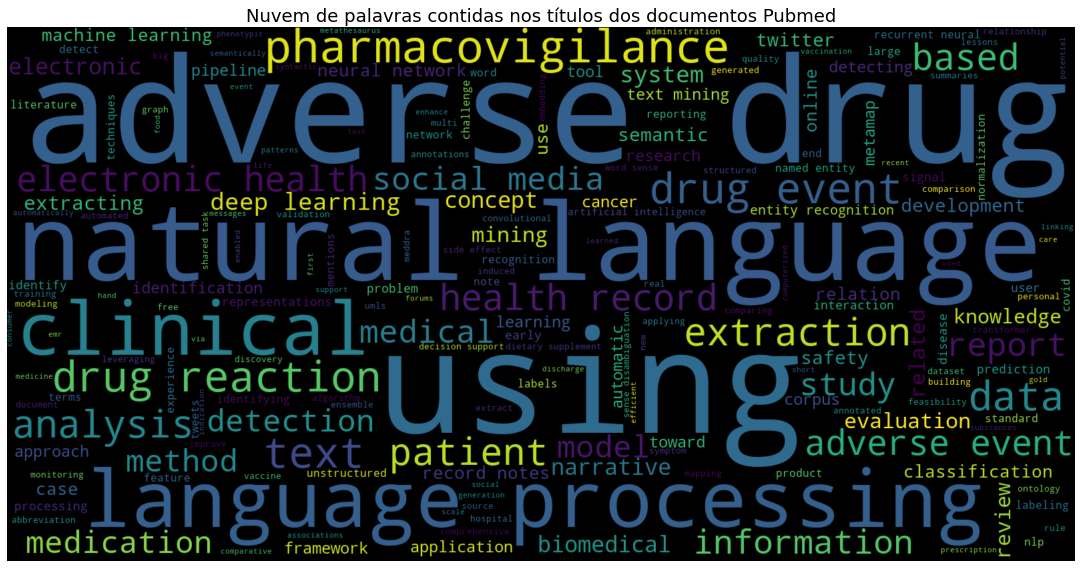

In [131]:
# variáveis
titulo = 'Nuvem de palavras contidas nos títulos dos documentos Pubmed'
#eixo_x = ''
#eixo_y = ''
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'wordcloud_titulo_pubmed-'+dataFormatada


#gráfico
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud_titulo_pubmed, interpolation='bilinear')
ax.set_axis_off()         

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)
#plt.grid(True)

#salvar imagens
#plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

## Exportação do resultado para Excel

In [ ]:
df_pubmed.columns

In [ ]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_pubmed = os.path.join('../data','resultado_pubmed-'+dataFormatada+'.xlsx')
sheetname="base_pubmed"

df_xlsx_pubmed = pd.DataFrame(df_pubmed, columns = [
    'id_pubmed', 'titulo_documento','titulo_documento_pubmed','ano_publicacao_pubmed','fonte','autores_pubmed', 'citacao_pubmed',
    'primeiro_autor_pubmed', 'jornal_book_pubmed','data_criacao_pubmed',
    'id_pmc_pubmed', 'id_nihms_pubmed', 'doi','doi_pubmed'
    ,])
df_xlsx_pubmed = df_xlsx_pubmed.to_excel(resultado_pubmed,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

# Concatenação de dataframes

In [132]:
#https://www.acervolima.com.br/2020/08/concat-e-append-do-pandas-como-usar.html
qtde_scopus = df_scopus.titulo_documento.count()
qtde_pubmed = df_pubmed.titulo_documento.count()

# 3 colunas em comum: titulo_documento, id_pubmed, fonte
shape_scopus = df_scopus.shape
shape_pubmed = df_pubmed.shape

print(f'A quantidade de documentos na base scopus é: {qtde_scopus} e a quantidade de colunas é {shape_scopus}')
print(f'A quantidade de documentos na base pubmed é: {qtde_pubmed} e a quantidade de colunas é {shape_pubmed}')
print(f'O total de documentos concatedos tem que ser {qtde_pubmed+qtde_scopus}')

A quantidade de documentos na base scopus é: 523 e a quantidade de colunas é (523, 60)
A quantidade de documentos na base pubmed é: 187 e a quantidade de colunas é (187, 14)
O total de documentos concatedos tem que ser 710


In [133]:
frames = [df_scopus, df_pubmed]
df_bases = pd.concat(frames)
df_bases

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
95,"Corso D.M., Pucino F., DeLeo J.M., Calis K.A.,...",6602576929;6701705695;35579441300;57221571096;...,development of a questionnaire for detecting p...,1992.0,Annals of Pharmacotherapy,26,7-8,NaN,890,896,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,"Yokotsuka M., Aoyama M., Kubota K.",6505861090;7202591218;24356074400;,the use of a medical dictionary for regulatory...,2000.0,International Journal of Medical Informatics,57,2-3,NaN,139,153,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,Aronson A.R.,17933416200;,effective mapping of biomedical text to the um...,2001.0,Proceedings / AMIA ... Annual Symposium. AMIA ...,NaN,NaN,NaN,17,21,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Bates D.W., Evans R.S., Murff H., Stetson P.D....",57113031900;7405652324;6701719661;7005833624;6...,detecting adverse events using information tec...,2003.0,Journal of the American Medical Informatics As...,10,2,NaN,115,128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,"Brennan P.F., Aronson A.R.",35473309900;17933416200;,towards linking patients and clinical informat...,2003.0,Journal of Biomedical Informatics,36,4-5,NaN,334,341,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,NaN,NaN,named entity recognition in pubmed abstracts f...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Nghiem TT, Bousquet C.",Stud Health Technol Inform. 2022 May 25;294:87...,Nghiem TT,Stud Health Technol Inform,2022.0,2022/05/25,NaN,NaN,10.3233/SHTI220615,Named Entity Recognition in Pubmed Abstracts f...
88,NaN,NaN,using machine learning for pharmacovigilance a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Pilipiec P, Liwicki M, Bota A.",Pharmaceutics. 2022 Jan 23;14(2):266. doi: 10....,Pilipiec P,Pharmaceutics,2022.0,2022/02/26,PMC8924891,NaN,10.3390/pharmaceutics14020266,Using Machine Learning for Pharmacovigilance: ...
178,NaN,NaN,using a machine learning approach to monitor c...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Lian AT, Du J, Tang L.",Vaccines (Basel). 2022 Jan 11;10(1):103. doi: ...,Lian AT,Vaccines (Basel),2022.0,2022/01/22,PMC8781534,NaN,10.3390/vaccines10010103,Using a Machine Learning Approach to Monitor C...
186,NaN,NaN,clinical note section detection using a hidden...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Eisman AS, Brown KA, Chen ES, Sarkar IN.",AMIA Annu Symp Proc. 2022 Feb 21;2021:418-427....,Eisman AS,AMIA Annu Symp Proc,2022.0,2022/03/21,PMC8861726,NaN,NaN,Clinical Note Section Detection Using a Hidden...


## Remover caracteres especiais

In [134]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_documento','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_documento,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
100,an ontology enabled natural language processin...,28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


In [135]:
df_bases.query('doi_scopus == "10.1007/978-3-319-48472-3_43" ')[['titulo_documento','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_documento,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
289,an ontology enabled natural language processin...,NaN,03029743,10.1007/978-3-319-48472-3_43,NaN


### Remover caracteres especiais

In [136]:
#remove números e caracteres especiais
#df_bases["titulo_documento"] = df_bases["titulo_documento"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|“|”|"|—|•', ' ', x))

df_bases["titulo_documento"] = df_bases["titulo_documento"].apply(lambda x: re.sub('\?|\*|;|,|\.|-|–|:|"|•', ' ', x))

In [137]:
df_bases.loc[:,'titulo_documento'] = df_bases['titulo_documento'].apply(limpar_campo)

In [138]:
df_bases['titulo_documento'] = df_bases['titulo_documento'].str.replace('  ', ' ')

In [139]:
df_bases["titulo_documento"] = df_bases["titulo_documento"].str.strip()

In [140]:
df_bases.query('doi_pubmed == "10.1007/978-3-319-48472-3_43" ')[['titulo_documento','id_pubmed','issn_scopus','doi_scopus','doi_pubmed']]

,titulo_documento,id_pubmed,issn_scopus,doi_scopus,doi_pubmed
100,an ontology enabled natural language processin...,28664200.0,NaN,NaN,10.1007/978-3-319-48472-3_43


## Exclusão de documentos da base final

### Exclusão de documentos duplicados

In [141]:
## ordenando de forma para que fique os documentos da base scopus
df_bases = df_bases.sort_values(['fonte','autores_pubmed'])

In [142]:
## Length total 724 - sem duplicidades = 553, porém, na exclusão fica 554, ajustado para ficar 553
df_bases.titulo_documento.value_counts()

training augmented intelligent capabilities for pharmacovigilance applying deep learning approaches to individual case safety report processing     2
comparing the effectiveness of computerized adverse drug event monitoring systems to enhance clinical decision support for hospitalized patients    2
using natural language processing and network analysis to develop a conceptual framework for medication therapy management research                 2
on the creation of a clinical gold standard corpus in spanish mining adverse drug reactions                                                         2
efficient identification of nationally mandated reportable cancer cases using natural language processing and machine learning                      2
                                                                                                                                                   ..
analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases

In [143]:
df_bases.query('titulo_documento == "ai based language models powering drug discovery and development" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
5,NaN,PubMed,34216835.0,NaN,ai based language models powering drug discove...
321,2-s2.0-85110540049,Scopus,34216835.0,15.0,ai based language models powering drug discove...


In [144]:
df_bases.query('titulo_documento == "adverse drug event discovery using biomedical literature a big data neural network adventure" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
37,NaN,PubMed,29222076.0,NaN,adverse drug event discovery using biomedical ...
82,2-s2.0-85047825131,Scopus,NaN,1.0,adverse drug event discovery using biomedical ...


In [145]:
## de 724 para [561 rows x 69 columns] (antigo)
## Novo 710 para 548 rows
df_bases = df_bases.drop_duplicates(['titulo_documento', 'doi'], keep='last') 
print(df_bases)

                                        autores_scopus  \
42                                                 NaN   
164                                                NaN   
85                                                 NaN   
122                                                NaN   
99                                                 NaN   
..                                                 ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T...   
468  Yang J.C., Thygesen J.H., Werbeloff N., Hayes ...   
467        Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.   
456                                       Aronson J.K.   
455  Portelli B., Scaboro S., Tonino R., Chersoni E...   

                                            id_autores  \
42                                                 NaN   
164                                                NaN   
85                                                 NaN   
122                                                NaN   
99           

In [146]:
#### de 561 para [554 rows x 554 columns] (antigo)
## new de 548 para 541
df_bases = df_bases.drop_duplicates(['titulo_documento', 'id_pubmed'], keep='last') 
print(df_bases)

                                        autores_scopus  \
42                                                 NaN   
122                                                NaN   
99                                                 NaN   
174                                                NaN   
181                                                NaN   
..                                                 ...   
457  Nishioka S., Watanabe T., Asano M., Yamamoto T...   
468  Yang J.C., Thygesen J.H., Werbeloff N., Hayes ...   
467        Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.   
456                                       Aronson J.K.   
455  Portelli B., Scaboro S., Tonino R., Chersoni E...   

                                            id_autores  \
42                                                 NaN   
122                                                NaN   
99                                                 NaN   
174                                                NaN   
181          

In [147]:
df_bases.query('titulo_documento == "ai based language models powering drug discovery and development" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
321,2-s2.0-85110540049,Scopus,34216835.0,15.0,ai based language models powering drug discove...


In [148]:
df_bases.query('titulo_documento == "adverse drug event discovery using biomedical literature a big data neural network adventure" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
82,2-s2.0-85047825131,Scopus,NaN,1.0,adverse drug event discovery using biomedical ...


In [149]:
df_bases.titulo_documento.value_counts()

visualising patterns associated with adverse drug reactions in french forums                                               1
clinical natural language processing with deep learning                                                                    1
named entity recognition from chinese adverse drug event reports with lexical feature based bilstm crf and tri training    1
a disease inference method based on symptom extraction and bidirectional long short term memory networks                   1
szte nlp clinical text analysis with named entity recognition                                                              1
                                                                                                                          ..
automatically detecting failures in natural language processing tools for online community text                            1
on the creation of a clinical gold standard corpus in spanish mining adverse drug reactions                                1


In [150]:
df_bases.query('titulo_documento == "in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
141,NaN,PubMed,25486901.0,NaN,in silico analysis of autoimmune diseases and ...


In [151]:
df_bases.query('id_pubmed == 25486901.0 ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento
141,NaN,PubMed,25486901.0,NaN,in silico analysis of autoimmune diseases and ...
154,2-s2.0-84923927235,Scopus,25486901.0,1.0,analysis of autoimmune diseases and genetic re...


In [152]:
mask = (df_bases['id_pubmed'] == 25486901.0) & (df_bases['fonte'] == 'PubMed')
df_bases = df_bases.loc[~mask]

In [153]:
df_bases.query('titulo_documento == "in silico analysis of autoimmune diseases and genetic relationships to vaccination against infectious diseases" ')[['eid','fonte','id_pubmed','quantidade_paginas_','titulo_documento']]

,eid,fonte,id_pubmed,quantidade_paginas_,titulo_documento


### Exclusão de documentos por tipo
##### Tipos: "Conference Review","Editorial","Letter","Note"

In [154]:
# ver os tipos de documentos
df_bases.groupby(by=["tipo_documento"]).sum()

,ano,quantidade_paginas,quantidade_citacoes,numeros_sequencia_molecular,texto_financiamento_4,texto_financiamento_5,texto_financiamento_6,texto_financiamento_7,texto_financiamento_8,texto_financiamento_9,texto_financiamento_10,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_,ano_publicacao_pubmed
tipo_documento,,,,,,,,,,,,,,,,,
Article,659295.0,0.0,9267.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.150187e+09,120805.0,122629.0,2151.0,0.0
Book,2014.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,1.0,264.0,264.0,0.0
Book Chapter,14119.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,2646.0,2738.0,99.0,0.0
Conference Paper,316480.0,11.0,1207.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20444088.0,9.948066e+08,57346.0,58240.0,1051.0,0.0
Conference Review,6046.0,1942.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,428626.0,0.000000e+00,1.0,132.0,134.0,0.0
Editorial,2015.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.654701e+07,288.0,291.0,4.0,0.0
Note,4039.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.986009e+07,73.0,86.0,15.0,0.0
Review,50437.0,0.0,707.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.143306e+08,9792.0,9967.0,200.0,0.0


In [155]:
## antes - 553 para = 540 rows × 69 columns
## agora - 541 para = 534 rows × 70 columns
# retirar documentos: Conference Review, Editorial, letter e Note
# gerar plan geral e testar se os filtros funcionam só no scopus para maior assertividade

lista_tipo_doc = ["Conference Review","Editorial","Letter","Note"]

df_bases_filtrado = df_bases.query('tipo_documento != @lista_tipo_doc ') 
df_bases_filtrado

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
42,NaN,NaN,visualising patterns associated with adverse d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Allam N, Audeh B, Jaulent MC, Bousquet C.",Stud Health Technol Inform. 2021 May 27;281:11...,Allam N,Stud Health Technol Inform,2021.0,2021/05/27,NaN,NaN,10.3233/SHTI210368,Visualising Patterns Associated with Adverse D...
122,NaN,NaN,v3nlp framework tools to build applications fo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Divita G, Carter ME, Tran LT, Redd D, Zeng QT,...",EGEMS (Wash DC). 2016 Aug 11;4(3):1228. doi: 1...,Divita G,EGEMS (Wash DC),2016.0,2016/09/30,PMC5019303,NaN,10.13063/2327-9214.1228,v3NLP Framework: Tools to Build Applications f...
99,NaN,NaN,intelligent telehealth in pharmacovigilance a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Edrees H, Song W, Syrowatka A, Simona A, Amato...",Drug Saf. 2022 May;45(5):449-458. doi: 10.1007...,Edrees H,Drug Saf,2022.0,2022/05/17,PMC9112241,NaN,10.1007/s40264-022-01172-5,Intelligent Telehealth in Pharmacovigilance: A...
174,NaN,NaN,artificial intelligence enabled social media a...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Hussain Z, Sheikh Z, Tahir A, Dashtipour K, Go...",JMIR Public Health Surveill. 2022 May 27;8(5):...,Hussain Z,JMIR Public Health Surveill,2022.0,2022/02/10,PMC9150729,NaN,10.2196/32543,Artificial Intelligence-Enabled Social Media A...
181,NaN,NaN,prediction of personal experience tweets of me...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jiang K, Chen T, Calix RA, Bernard GR.",Annu Int Conf IEEE Eng Med Biol Soc. 2019 Jul;...,Jiang K,Annu Int Conf IEEE Eng Med Biol Soc,2019.0,2020/01/18,NaN,NaN,10.1109/EMBC.2019.8856753,Prediction of Personal Experience Tweets of Me...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,"Nishioka S., Watanabe T., Asano M., Yamamoto T...",57665231500;57665866200;57666183300;5766650440...,identification of hand foot syndrome from canc...,2022.0,PLoS ONE,17,5 May,e0267901,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
468,"Yang J.C., Thygesen J.H., Werbeloff N., Hayes ...",57202692614;42162169300;25522505100;3651863010...,antipsychotic polypharmacy and adverse drug re...,2022.0,Psychological Medicine,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
467,"Vo T.H., Nguyen N.T.K., Kha Q.H., Le N.Q.K.",57671574900;57211071169;57224131231;57208281644;,on the road to explainable ai in drug drug int...,2022.0,Computational and Structural Biotechnology Jou...,20,NaN,NaN,2112,2123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
456,Aronson J.K.,55683060600;,artificial intelligence in pharmacovigilance a...,2022.0,Drug Safety,45,5,NaN,407,418,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exclusão de documentos com menos de 4 páginas

In [156]:
# Ordenando 
df_bases_filtrado = df_bases_filtrado.sort_values(['titulo_documento','id_pubmed'])
df_bases_filtrado

,autores_scopus,id_autores,titulo_documento,ano,titulo_fonte,volume,publicado,numero_documento,inicio_pagina,fim_pagina,...,autores_pubmed,citacao_pubmed,primeiro_autor_pubmed,jornal_book_pubmed,ano_publicacao_pubmed,data_criacao_pubmed,id_pmc_pubmed,id_nihms_pubmed,doi_pubmed,titulo_documento_pubmed
66,"Henry S., Buchan K., Filannino M., Stubbs A., ...",57195512541;57194652773;25633782800;5608637130...,2018 n2c2 shared task on adverse drug events a...,2020.0,Journal of the American Medical Informatics As...,27,1,NaN,3,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,"Wu Y., Denny J.C., Rosenbloom S.T., Miller R.A...",55645924700;7005252620;7003853908;8093690100;6...,a comparative study of current clinical natura...,2012.0,AMIA ... Annual Symposium proceedings / AMIA S...,2012,NaN,NaN,997,1003,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,"Sabra S., Sabeeh V.",57189298972;57202214511;,a comparative study of n gram and skip gram fo...,2020.0,Proceedings - 2020 International Conference on...,NaN,NaN,9458183,807,812,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
214,"Danger R., Segura-Bedmar I., Martínez P., Ross...",55920998300;35303400800;7202906176;8960238100;,a comparison of machine learning techniques fo...,2010.0,Journal of Biomedical Informatics,43,6,NaN,902,913,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
368,"Qiu Y., Zhang Y., Deng Y., Liu S., Zhang W.",57216565394;57218471527;57219231397;5721088672...,a comprehensive review of computational method...,2021.0,IEEE/ACM Transactions on Computational Biology...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42,NaN,NaN,visualising patterns associated with adverse d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Allam N, Audeh B, Jaulent MC, Bousquet C.",Stud Health Technol Inform. 2021 May 27;281:11...,Allam N,Stud Health Technol Inform,2021.0,2021/05/27,NaN,NaN,10.3233/SHTI210368,Visualising Patterns Associated with Adverse D...
156,"Chase H.S., Kaufman D.R., Johnson S.B., Mendon...",7103097287;34770630900;7406330166;7004308859;,voice capture of medical residents' clinical i...,2009.0,Journal of the American Medical Informatics As...,16,3,NaN,387,394,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
298,"Priyadarshi A., Saha S.K.",57212489282;36937742800;,web information extraction for finding remedy ...,2020.0,Network Modeling Analysis in Health Informatic...,9,1,9,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
347,"Jiang J., Guan Y., Zhao C.",56376858400;7202924009;57189217850;,wi enre in clef ehealth evaluation lab 2015 cl...,2015.0,CEUR Workshop Proceedings,1391,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Exclusão de documentos com outros critérios

In [157]:
## verificar pq excluo estes, por enquanto nao excluir ##777

#df_bases_filtrado.query('titulo_documento== "extraction of adverse drug effects from clinical records"')

## Ajustes de bases indexadas final

In [158]:
# Criar colunas
df_bases_filtrado['documentos_6+']=0 # variavel que marca os documentos + tops para ler
df_bases_filtrado['documentos_94+']=0 # variavel que marca os documentos + tops para ler
df_bases_filtrado['pdf_baixado']=0 #

df_bases_filtrado['leitura_resumo']=0 # 0 nao foi lido e 1 foi lido 
df_bases_filtrado['leitura_conclusao']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['leitura_completa']=0 # 0 nao foi lido e 1 foi lido
df_bases_filtrado['resumo_traduzido']=None
df_bases_filtrado['conclusao_traduzida']=None

# colunas para marcar estudo posterior para conceitos
df_bases_filtrado['conceituar_metamap']=0 # variavel que marca documento para rever conceito
df_bases_filtrado['conceituar_farmacovigilancia']=0 # variavel que marca documento para rever conceito
df_bases_filtrado['conceituar_Reacao_adversa_medicamentos_RAM']=0 # variavel que marca documento para rever conceito
df_bases_filtrado['conceituar_reconhecimento_entidades_nomeadas_REN']=0 # variavel que marca documento para rever conceito
df_bases_filtrado['conceituar_UMLS']=0
df_bases_filtrado['conceituar_metamap_data_file_builder_DFB']=0
df_bases_filtrado['conceituar_ferramenta_lexicos_LVG']=0
df_bases_filtrado['conceituar_MetamorphoSys']=0
df_bases_filtrado['conceituar_NLP']=0
df_bases_filtrado['conceituar_outros']=None
df_bases_filtrado['observacao']=None
df_bases_filtrado['sincronizado_mendeley']=0
df_bases_filtrado['data_leitura_resumo']=None
df_bases_filtrado['data_leitura_completa']=None
df_bases_filtrado['palavras_chaves_titulo']=None # variavel para receber as palavras + importantes em um documento
df_bases_filtrado['palavras_chaves_resumo']=None # variavel para receber as palavras + importantes em um documento

In [159]:
# Colocar estes campos no dataframe final filtrado

df_bases_filtrado.loc[
    (df_bases_filtrado['titulo_documento'].str.contains('twitter'))|
    (df_bases_filtrado['titulo_documento'].str.contains('metamap'))|
    (df_bases_filtrado['titulo_documento'].str.contains('NLP'))|
    (df_bases_filtrado['titulo_documento'].str.contains('social media'))|
    (df_bases_filtrado['titulo_documento'].str.contains('social network'))|
    (df_bases_filtrado['titulo_documento'].str.contains('natural language processing')),'palavras_chaves_titulo'] = "twitter|metamap|nlp"

df_bases_filtrado.query('palavras_chaves_titulo=="twitter|metamap|nlp"')['titulo_documento'].count()

130

In [160]:
df_bases_filtrado.loc[
    (df_bases_filtrado['resumo'].str.contains('twitter'))|
    (df_bases_filtrado['resumo'].str.contains('metamap'))|
    (df_bases_filtrado['resumo'].str.contains('NLP'))|
    (df_bases_filtrado['resumo'].str.contains('social media'))|
    (df_bases_filtrado['resumo'].str.contains('social network'))|
    (df_bases_filtrado['resumo'].str.contains('natural language processing')),'palavras_chaves_resumo'] = "twitter|metamap|nlp"


df_bases_filtrado.query('palavras_chaves_resumo=="twitter|metamap|nlp"')['resumo'].count()

392

## Traduzir conteúdo de colunas

<b>Ajustes a serem realizados com a biblioteca de tradução</b>
1. pip install google_trans_new
1. ir no local da instalação e ajustar o arquivo (..\Python\Lib\site-packages\google_trans_new) "google_trans_new.py"
1. alterar linha 151, **de**:  response = (decoded_line + ']') **para**: response = (decoded_line + '')
1. reiniciar o kernel do Python/Jupyter

<br>

**Referências**
<br>
https://thewebdev.info/2022/04/17/how-to-fix-googletrans-stopped-working-with-error-nonetype-object-has-no-attribute-group-with-python/ <br>
https://github.com/lushan88a/google_trans_new/issues/46 <br>
https://www.linkedin.com/pulse/traduzindo-dados-pandasdataframe-com-google-translate-romerito-morais/?originalSubdomain=pt (testar este)

In [161]:
translator = google_translator()

In [ ]:
df_bases_filtrado['titulo_documento_traduzido']=df_bases_filtrado['titulo_documento'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

In [ ]:
%%time
df_bases_filtrado['titulo_documento_pubmed_traduzido']=df_bases_filtrado['titulo_documento_pubmed'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

In [ ]:
%%time
df_bases_filtrado['resumo_traduzido_google_translator']=df_bases_filtrado['resumo'].apply(lambda x: translator.translate(x,lang_tgt='pt'))

In [ ]:
df_bases_filtrado[['leitura_conclusao']]

## Reanalisar bases

In [ ]:
print('Verificando tipos e se tem dados nulos')
df_bases_filtrado.info()

In [ ]:
print(df_bases_filtrado.nunique()) ## ver como aparecer todoas as colunas

In [ ]:
df_bases_filtrado.isnull().sum()

In [ ]:
print('Resumo Estatístico de Campos Numéricos')
## selecionar as colunas necessárias
df_bases_filtrado.describe()

## Visualizações de bases

### Analisando documentos por Ano

In [ ]:
## concatenar os anos de ambos dfs

### Nuvem de Palavras

#### Nuvem de Palavras dos Títulos

In [ ]:
palavras_titulo_bases  = df_bases_filtrado['titulo_documento'].str.lower()
palavras_titulo_bases

In [ ]:
wordcloud_palavras_titulo_bases = " ".join(s for s in palavras_titulo_bases)

print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo_bases)} e seu tipo atual é {type(wordcloud_palavras_titulo_bases)}')

wordcloud_titulo_bases = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo_bases)

In [ ]:
# variáveis
titulo = 'Nuvem de palavras contidas nos títulos'
#eixo_x = ''
#eixo_y = ''
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'wordcloud_titulo_geral'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud_titulo_bases, interpolation='bilinear')
ax.set_axis_off()         

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)
#plt.grid(True)

#salvar imagens
#plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

#### Nuvem de Palavras dos Títulos em português

In [ ]:
stopwords_pt = nltk.corpus.stopwords.words('portuguese')
print(stopwords_pt)

In [ ]:
palavras_titulo_bases_pt  = df_bases_filtrado['titulo_documento_traduzido'].str.lower()
palavras_titulo_bases_pt

In [ ]:
wordcloud_palavras_titulo_pt = " ".join(s for s in palavras_titulo_bases_pt)

print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo_bases)} e seu tipo atual é {type(wordcloud_palavras_titulo_bases)}')

wordcloud_titulo_pt = WordCloud(stopwords=stopwords_pt,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo_pt)

In [ ]:
# variáveis
titulo = 'Nuvem de palavras contidas nos títulos em português'
#eixo_x = ''
#eixo_y = ''
extensao_arquivo = '.png'
path_image = '../image/'
image = path_image+'wordcloud_titulo_portugues'+dataFormatada

#gráfico
fig, ax = plt.subplots(figsize=(16,8))
ax.imshow(wordcloud_titulo_pt, interpolation='bilinear')
ax.set_axis_off()         

# legenda
#ax.legend(title='Legenda', loc=1, fontsize=9)
ax.set_title(titulo,  fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)
#plt.grid(True)

#salvar imagens
#plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.savefig(image+extensao_arquivo, format='png', dpi=300, bbox_inches='tight', transparent=False)
plt.tight_layout() ## ver se é necessário
plt.show()

#### Nuvem de Palavras dos Resumos em português

## Exportação de arquivo

In [ ]:
df_bases_filtrado.columns

In [ ]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_dfs = os.path.join('../data','bases_filtradas-resumida-'+dataFormatada+'.xlsx')
sheetname="bases_filtradas"

df_xlsx_dfs = pd.DataFrame(df_bases_filtrado, columns = [   
    'eid', 'doi', 'titulo_documento', 'titulo_documento_traduzido',#'titulo_documento_scopus','titulo_documento_scopus_traduzido',
    'ano',
    'palavras_chaves_titulo','quantidade_citacoes',
    'resumo', 'resumo_traduzido_google_translator', 'palavras_chaves_resumo', 'conclusao_traduzida', 
     'quantidade_paginas_','status_pagina','link_scopus', 'editor',
    
    # Conferencia
    'nome_conferencia', 'data_conferencia', 'local_conferencia', 'codigo_conferencia',
    
     'idioma_original', 'tipo_documento', 'acesso_livre', 'fonte', 

       'ano_publicacao_pubmed', 'data_criacao_pubmed',
       'doi_pubmed',
       
    # Campos criados para preenchimento
    'documentos_6+', 'documentos_94+', 'pdf_baixado', 'leitura_resumo','leitura_completa', 
       'conceituar_metamap', 'conceituar_farmacovigilancia', 'conceituar_Reacao_adversa_medicamentos_RAM',
       'conceituar_reconhecimento_entidades_nomeadas_REN', 'conceituar_UMLS',
       'conceituar_metamap_data_file_builder_DFB', 'conceituar_ferramenta_lexicos_LVG', 'conceituar_MetamorphoSys',
       'conceituar_NLP', 'conceituar_outros', 'observacao', 'leitura_conclusao',
       'sincronizado_mendeley', 'data_leitura_resumo', 'data_leitura_completa', 
    'status_resumo','citado_no_trabalho','leitura_introducao','Ler-artigo-completo?',
    'obs_introducao','leitura_conclusao',
    ])
df_xlsx_dfs = df_xlsx_dfs.to_excel(resultado_dfs,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

In [ ]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_dfs = os.path.join('../data','bases_filtradas-completa-'+dataFormatada+'.xlsx')
sheetname="bases_completa"

df_xlsx_dfs = pd.DataFrame(df_bases_filtrado, columns = [   
'autores_scopus', 'id_autores', 'titulo_documento', 'ano', 'titulo_fonte',
       'volume', 'publicado', 'numero_documento', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi_scopus',
       'link_scopus', 'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3',
       'texto_financiamento_4', 'texto_financiamento_5',
       'texto_financiamento_6', 'texto_financiamento_7',
       'texto_financiamento_8', 'texto_financiamento_9',
       'texto_financiamento_10', 'referencias', 'endereco_correspondencia',
       'editores', 'patrocinadores', 'editor', 'nome_conferencia',
       'data_conferencia', 'local_conferencia', 'codigo_conferencia',
       'issn_scopus', 'isbn', 'coden', 'id_pubmed', 'idioma_original',
       'titulo_abreviado_fonte', 'tipo_documento', 'etapa_publicacao',
       'acesso_livre', 'fonte', 'eid', 'doi', 'titulo_documento_scopus',
       'inicio_pagina_', 'fim_pagina_', 'quantidade_paginas_', 'status_pagina',
       'autores_pubmed', 'citacao_pubmed', 'primeiro_autor_pubmed',
       'jornal_book_pubmed', 'ano_publicacao_pubmed', 'data_criacao_pubmed',
       'id_pmc_pubmed', 'id_nihms_pubmed', 'doi_pubmed',
       'titulo_documento_pubmed', 'documentos_6+', 'documentos_94+',
       'pdf_baixado', 'leitura_resumo', 'leitura_conclusao',
       'leitura_completa', 'resumo_traduzido', 'conclusao_traduzida',
       'conceituar_metamap', 'conceituar_farmacovigilancia',
       'conceituar_Reacao_adversa_medicamentos_RAM',
       'conceituar_reconhecimento_entidades_nomeadas_REN', 'conceituar_UMLS',
       'conceituar_metamap_data_file_builder_DFB',
       'conceituar_ferramenta_lexicos_LVG', 'conceituar_MetamorphoSys',
       'conceituar_NLP', 'conceituar_outros', 'observacao',
       'sincronizado_mendeley', 'data_leitura_resumo', 'data_leitura_completa',
       'palavras_chaves_titulo', 'palavras_chaves_resumo',
       'titulo_documento_scopus_traduzido', 'titulo_documento_pubmed_traduzido',
       'resumo_traduzido_google_translator' 
    ])
df_xlsx_dfs = df_xlsx_dfs.to_excel(resultado_dfs,sheet_name=sheetname,index=False, encoding='utf-8', header=True)

# Curiosidades

**dois documentos?**
<br>

Erratum to: Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter (Drug Safety DOI: 10.1007/s40264-014-0155-x)

<br>

Digital drug safety surveillance: Monitoring pharmaceutical products in Twitter

In [ ]:
data_fim = pd.Timestamp.now()

In [ ]:
print(f'Programa iniciado em: {data_inicio}, e terminado em {data_fim}. Tempo de {data_fim - data_inicio}.')

In [ ]:
print(f'Shape da planinha: {df_bases_filtrado.shape}')

# Cria arquivo requirements para nova instalação